## 6 factor analysis and prediction
1. Use the cleaned and preprossed company information and person information to construct a dataframe for High-Net-Worth-Company liquidity based on Michel's 6 factor model.
2. Use those data to train a model and do a prediction.

In [1]:
import pandas as pd
df_comp_info = pd.read_pickle('../../Database/EMIS/preprocessed/comp_info_human_20180310.pickle')
df_fina_info = pd.read_pickle('../../Database/EMIS/preprocessed/fina_info_20180309.pickle')
print(df_comp_info.shape, df_fina_info.shape)

((14831, 30), (10000, 161))


## 6 factor model

In [23]:
# How many shareholders are human and have equity information.
# Obtain the set of those shareholders' names
# And find those shareholders which are companies.
import numpy as np
df_comp_info[df_comp_info["Shareholder_Is_Human"]==True].shape
count = 0
sh_name_set = set()
for idx, row in df_comp_info.iterrows():
    if row["Shareholder_Is_Human"] and not np.isnan(row["Equity"]):
        sh_name_set.add(row["Shareholder"])
        count += 1
print(count,len(sh_name_set))

# Obtain those company names which has equity information.
count_comp = 0
sh_comp_name_set = set()
for idx, row in df_comp_info.iterrows():
    if row["Shareholder"] and not row["Shareholder_Is_Human"] and not np.isnan(row["Equity"]):
        sh_comp_name_set.add(row["Shareholder"])
        count_comp += 1
print(count_comp,len(sh_comp_name_set))

(1826, 1786)
(2851, 2098)


In [24]:
from functools import reduce
from time import time
df_total_liquidity_company = pd.DataFrame(columns=['Shareholder', 'Shareholder_Name_Normalized', 'Company_Profile',
                                                  'Company_CNPJ', 'Company_Equity', 'Company_Number', 'Industry_List',
                                                  'NAICS_Num_List', 'Industry_Number', 'Total_Deal_Liquidity_Rev',
                                                  'Total_Deal_Liquidity_EBIT', 'Total_Dividends_Buyback_NI',
                                                  'Total_Dividends_Buyback_Rev', 'Total_Dividends_Buyback_EBIT',
                                                  'Total_Stock_Compensation_Rev'])


df_total_liquidity_company['Shareholder'] = list(sh_comp_name_set)
start_time = time()
for idx, name in enumerate(df_total_liquidity_company["Shareholder"]):
    comp_profile = df_comp_info[df_comp_info["Shareholder"]==name]
    df_total_liquidity_company.at[idx, "Shareholder_Name_Normalized"] = comp_profile[
        "Shareholder_Name_Normalized"].items().next()[1]
    df_total_liquidity_company.at[idx, "Company_Profile"] = ';'.join(list(comp_profile["Company"]))
    df_total_liquidity_company.at[idx, "Company_CNPJ"] = ';'.join(list(comp_profile["CNPJ"]))
    df_total_liquidity_company.at[idx, "Company_Equity"] = ';'.join(
        [name+'('+str(equity)+'%)' for name, equity in zip(
                list(comp_profile["CNPJ"]),list(comp_profile["Equity"]))])
    df_total_liquidity_company.at[idx, "Company_Number"] = int(comp_profile.shape[0])
    df_total_liquidity_company.at[idx, "Industry_List"] = ';'.join(
        reduce((lambda x, y: set(x)|set(y)), [in_ls.split(';') for in_ls in comp_profile["Industry_List"]]))
    df_total_liquidity_company.at[idx, "NAICS_Num_List"] = ';'.join(
        reduce((lambda x, y: set(x)|set(y)), [in_ls.split(';') for in_ls in comp_profile["NAICS_Num_List"]]))
    df_total_liquidity_company.at[idx, "Industry_Number"] = int(
        len(df_total_liquidity_company.at[idx, "NAICS_Num_List"].split(';')))
print("Time spent %s" % (time()-start_time))
df_total_liquidity_company[:10]

Time spent 5.29985785484


,Shareholder,Shareholder_Name_Normalized,Company_Profile,Company_CNPJ,Company_Equity,Company_Number,Industry_List,NAICS_Num_List,Industry_Number,Total_Deal_Liquidity_Rev,Total_Deal_Liquidity_EBIT,Total_Dividends_Buyback_NI,Total_Dividends_Buyback_Rev,Total_Dividends_Buyback_EBIT,Total_Stock_Compensation_Rev
0,Gavea Investimentos Ltda.,gavea investimentos ltd,Terra Santa Agro S.A.,05799312000120,05799312000120(14.03%),1,Sugarcane Farming,11193,1,NaN,NaN,NaN,NaN,NaN,NaN
1,Lynx Portifolio LLC,llc lynx portifolio,Metalurgica Gerdau S.A.,92690783000109,92690783000109(3.3%),1,Foundries,3315,1,NaN,NaN,NaN,NaN,NaN,NaN
2,Bastos-Adm. De Bens E Partic. Ltda.,adm bastos bens de e ltd partic,Eliane S.A. - Revestimentos Ceramicos,86532538000162,86532538000162(10.01%),1,Nonmetallic Mineral Product Manufacturing,327,1,NaN,NaN,NaN,NaN,NaN,NaN
3,Oas S.A.,oas s.a.,Oas Investimentos S.A. - em Recuperacao Judici...,07584023000130;14281701000150;11867422000185,07584023000130(100.0%);14281701000150(100.0%);...,3,"Architectural, Engineering, and Related Servi...",55;2213;5416;236;5413,5,NaN,NaN,NaN,NaN,NaN,NaN
4,Artur Eberhardt S.A.,artur eberhardt s.a.,Industrias Arteb S.A. Em Recuperacao Judicial ...,62291380000118,62291380000118(40.5%),1,Motor Vehicle Parts Manufacturing,3363,1,NaN,NaN,NaN,NaN,NaN,NaN
5,Fb Participacoes S/A,fb participacoes s.a.,Vigor Alimentos S.A.,13324184000197,13324184000197(72.35%),1,Food Manufacturing ; Management of Companies a...,311;55,2,NaN,NaN,NaN,NaN,NaN,NaN
6,Maquina De Vendas Brasil Participacoes S.A.,brasil de maquina participacoes s.a. vendas,Lojas Insinuante S.A.;Eletro Shopping Casa Ama...,16182834000103;70175260000183,16182834000103(100.0%);70175260000183(nan%),2,Electronics and Appliance Stores,443,1,NaN,NaN,NaN,NaN,NaN,NaN
7,Usiminas Participacoes e Logistica S/A,e logistica participacoes s.a. usiminas,Mrs Logistica S.A.,01417222000177,01417222000177(11.13%),1,Support Activities for Transportation ; Rail T...,488;482,2,NaN,NaN,NaN,NaN,NaN,NaN
8,Cbc Participações S.A.,cbc participacoes s.a.,Forjas Taurus S.A.,92781335000102,92781335000102(66.93%),1,Primary Metal Manufacturing,331,1,NaN,NaN,NaN,NaN,NaN,NaN
9,Edelweis Participação S/a,edelweis participacao s.a.,Magnesita Sa - Closed,19791268000117,19791268000117(3.69%),1,"Professional, Scientific, and Technical Services",541,1,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_total_liquidity_company["Industry_Number"].describe()

count     2099
unique      18
top          1
freq      1407
Name: Industry_Number, dtype: int64

In [25]:
print df_total_liquidity_company[df_total_liquidity_company["Company_Number"]==1].shape
print df_total_liquidity_company[df_total_liquidity_company["Company_Number"]==2].shape
print df_total_liquidity_company[df_total_liquidity_company["Company_Number"]==3].shape
print df_total_liquidity_company[df_total_liquidity_company["Company_Number"]==4].shape
print df_total_liquidity_company[df_total_liquidity_company["Company_Number"]==5].shape
print df_total_liquidity_company[df_total_liquidity_company["Company_Number"]==6].shape
print df_total_liquidity_company[df_total_liquidity_company["Company_Number"]==7].shape
print df_total_liquidity_company[df_total_liquidity_company["Company_Number"]==8].shape
print df_total_liquidity_company[df_total_liquidity_company["Company_Number"]==9].shape
print df_total_liquidity_company[df_total_liquidity_company["Company_Number"]>=10].shape

(1831, 15)
(134, 15)
(52, 15)
(22, 15)
(14, 15)
(8, 15)
(11, 15)
(2, 15)
(4, 15)
(20, 15)


## Industry mapping from NAICS (EMIS) to Damodaran's classification and multipliers

In [26]:
# Read industry sectors from IRS and Damondaran data mapping to Capital IQ industry sectors. 
industry_EMIS2Damodaran = pd.read_excel('../TableIRStoCapIQEMIS_NAICS.XLSX', sheet_name=0, skiprows = 1)
industry_EMIS2Damodaran = industry_EMIS2Damodaran.iloc[:,[1,3]]
industry_EMIS2Damodaran[:5]

,Damodaran (94),EMIS equivalent
0,Advertising,"Professional, Scientific, and Technical Serv..."
1,Aerospace/Defense,Manufacturing (31)
2,Air Transport,Transportation and Warehousing (48)
3,Apparel,Manufacturing (31)
4,Auto & Truck,Manufacturing (31)


In [28]:
# NAISC number -> NAICS classification
# NAICS classification -> Damodaran's classification
import re
from unidecode import unidecode
from collections import defaultdict
NAICS_Num_Ind_dict = dict()
NAICS_Damodaran_dict = defaultdict(set)
for idx, row in industry_EMIS2Damodaran.iterrows():
    (name, num) = re.findall(r'([a-zA-Z,\s]*)\s*\(([0-9]*)\)', row["EMIS equivalent"])[0]
    name = unidecode(name.strip())
    num = unidecode(num.strip())
    NAICS_Damodaran_dict[name].add(unidecode(row["Damodaran (94)"]))
    NAICS_Num_Ind_dict[unidecode(num)] = unidecode(name)
# Michel didn't use several EMIS classification
NAICS_Damodaran_dict['Management of Companies and Enterprises'] = set(industry_EMIS2Damodaran['Damodaran (94)'])
NAICS_Damodaran_dict['Other Services (except Public Administration)'] = set(industry_EMIS2Damodaran['Damodaran (94)'])
NAICS_Damodaran_dict['Public Administration'] = set(industry_EMIS2Damodaran['Damodaran (94)'])
NAICS_Num_Ind_dict['55'] = 'Management of Companies and Enterprises'
NAICS_Num_Ind_dict['81'] = 'Other Services (except Public Administration)'
NAICS_Num_Ind_dict['92'] = 'Public Administration'
# Several number doesn't list in the table
NAICS_Num_Ind_dict['32'] = NAICS_Num_Ind_dict['31']
NAICS_Num_Ind_dict['33'] = NAICS_Num_Ind_dict['31']
NAICS_Num_Ind_dict['45'] = NAICS_Num_Ind_dict['44']
NAICS_Num_Ind_dict['49'] = NAICS_Num_Ind_dict['48']
NAICS_Num_Ind_dict['45'] = NAICS_Num_Ind_dict['44']
print("The NAICS number to industries:\n %s\n" % NAICS_Num_Ind_dict)
print("The NAICS number to Damodaran classification:\n %s" % NAICS_Damodaran_dict)

The NAICS number to industries:
 {'61': 'Educational Services', '62': 'Health Care and Social Assistance', '49': 'Transportation and Warehousing', '81': 'Other Services (except Public Administration)', '21': 'Mining, Quarrying, and Oil and Gas Extraction', '48': 'Transportation and Warehousing', '23': 'Construction', '44': 'Retail Trade', '45': 'Retail Trade', '42': 'Wholesale Trade', '72': 'Accommodation and Food Services', '71': 'Arts, Entertainment, and Recreation', '92': 'Public Administration', '11': 'Agriculture, Forestry, Fishing and Hunting', '22': 'Utilities', '55': 'Management of Companies and Enterprises', '54': 'Professional, Scientific, and Technical Services', '31': 'Manufacturing', '56': 'Administrative and Support and Waste Management and Remediation Services', '51': 'Information', '53': 'Real Estate and Rental and Leasing', '52': 'Finance and Insurance', '33': 'Manufacturing', '32': 'Manufacturing'}

The NAICS number to Damodaran classification:
 defaultdict(<type 'set

In [29]:
# Multiplier for tax, price/sales(rev), ev/ebit, div/ni(or firm value), stock based compensation/sales(rev)
rate_tax = pd.read_excel('../../Damodaran_data/taxrateemerg.xls', skiprows=8)
multiplier_pv2se = pd.read_excel('../../Damodaran_data/psemerg.xls', skiprows=7)
multiplier_div2nifv = pd.read_excel('../../Damodaran_data/divfcfeemerg.xls', skiprows=7)
multiplier_sbc2s = pd.read_excel('../../Damodaran_data/marginemerg.xls', skiprows=8)

# Aggregate multipliers
ave_tax_multiplier_dict = defaultdict(list)
ave_price_rev_multiplier_dict = defaultdict(list) # Price/revenue
ave_ev_ebit_multiplier_dict = defaultdict(list) # EV/EBIT
ave_div_ni_multiplier_dict = defaultdict(list) # Dividend/NI
ave_div_fv_multiplier_dict = defaultdict(list) # Dividend/Firm_Value
ave_sbc_rev_multiplier_dict = defaultdict(list) # Stock-Based Compensation/revenue

for key in NAICS_Damodaran_dict:
    tax_multiplier = []
    ps_multiplier = []
    evs_multiplier = []
    div_ni_multiplier = []
    div_fv_multiplier = []
    sbc_multiplier = []
    for sub_sec in NAICS_Damodaran_dict[key]:
        tax_multiplier.append(
            rate_tax[rate_tax["Industry name"]==sub_sec]["Average across only money-making companies"].item())
        ps_multiplier.append(multiplier_pv2se[multiplier_pv2se["Industry Name"]==sub_sec]["Price/Sales"].item())
        evs_multiplier.append(multiplier_pv2se[multiplier_pv2se["Industry Name"]==sub_sec]["EV/Sales"].item())
        div_ni_multiplier.append(
            multiplier_div2nifv[multiplier_div2nifv["Industry name"]==sub_sec]["Cash Return as % of Net Income"].item())
        div_fv_multiplier.append(
            multiplier_div2nifv[multiplier_div2nifv["Industry name"]==sub_sec]["Cash/ Firm Value"].item())
        sbc_multiplier.append(
            multiplier_sbc2s[multiplier_sbc2s["Industry Name"]==sub_sec]["Stock-Based Compensation/Sales"].item())
    ave_tax_multiplier_dict[key] = np.nanmean(tax_multiplier)
    ave_price_rev_multiplier_dict[key] = np.nanmean(ps_multiplier)
    ave_ev_ebit_multiplier_dict[key] = np.nanmean(evs_multiplier)
    ave_div_ni_multiplier_dict[key] = np.nanmean(div_ni_multiplier)
    ave_div_fv_multiplier_dict[key] = np.nanmean(div_fv_multiplier)
    ave_sbc_rev_multiplier_dict[key] = np.nanmean(sbc_multiplier)

# Save the average Price/Sales, EV/Sales, and average tax rate into csv files
df_ave_tax_multiplier = pd.DataFrame.from_dict(ave_tax_multiplier_dict,orient='index')
df_ave_tax_multiplier.to_csv('./ave_tax_multiplier_EMIS.csv',
                         header=['average over Damodaran\'s sectors-Average across only money-making companies'],
                         index_label=['EMIS sectors'])
df_ave_price_rev_multiplier = pd.DataFrame.from_dict(ave_price_rev_multiplier_dict,orient='index')
df_ave_price_rev_multiplier.to_csv('./ave_price_rev_multiplier_EMIS.csv',
                         header=['average over Damodaran\'s sectors-Price/Sales'],
                         index_label=['EMIS sectors'])
df_ave_ev_ebit_multiplier = pd.DataFrame.from_dict(ave_ev_ebit_multiplier_dict,orient='index')
df_ave_ev_ebit_multiplier.to_csv('./ave_ev_ebit_multiplier_EMIS.csv',
                         header=['average over Damodaran\'s sectors-EV/Sales'],
                         index_label=['EMIS sectors'])
df_ave_div_ni_multiplier = pd.DataFrame.from_dict(ave_div_ni_multiplier_dict,orient='index')
df_ave_div_ni_multiplier.to_csv('./ave_div_ni_multiplier_EMIS.csv',
                         header=['average over Damodaran\'s sectors-Cash Return as % of Net Income'],
                         index_label=['EMIS sectors'])
df_ave_div_fv_multiplier = pd.DataFrame.from_dict(ave_div_fv_multiplier_dict,orient='index')
df_ave_div_fv_multiplier.to_csv('./ave_div_fv_multiplier_EMIS.csv',
                         header=['average over Damodaran\'s sectors-Cash/ Firm Value'],
                         index_label=['EMIS sectors'])
df_ave_sbc_rev_multiplier = pd.DataFrame.from_dict(ave_sbc_rev_multiplier_dict,orient='index')
df_ave_sbc_rev_multiplier.to_csv('./ave_sbc_rev_multiplier_EMIS.csv',
                         header=['average over Damodaran\'s sectors-Stock-Based Compensation/Sales'],
                         index_label=['EMIS sectors'])


# !!! Check with Michel if those multipliers for each industry classification from CapitalIQ make sense or not 
print("Average tax multiplier:\n %s\n" % ave_tax_multiplier_dict)
print("Average price/revenue multiplier:\n %s\n" % ave_price_rev_multiplier_dict)
print("Average ev/ebit multiplier:\n %s\n" % ave_ev_ebit_multiplier_dict)
print("Average divident/net income multiplier:\n %s\n" % ave_div_ni_multiplier_dict)
print("Average divident/firm value multiplier:\n %s\n" % ave_div_fv_multiplier_dict)
print("Average stock-based compensation/revenue multiplier:\n %s\n" % ave_sbc_rev_multiplier_dict)

Average tax multiplier:
 defaultdict(<type 'list'>, {'Information': 0.19362757792268886, 'Administrative and Support and Waste Management and Remediation Services': 0.18673070255513236, 'Mining, Quarrying, and Oil and Gas Extraction': 0.23468760742382266, 'Wholesale Trade': 0.2326612032422831, 'Public Administration': 0.20782988690734586, 'Transportation and Warehousing': 0.21880855784380632, 'Professional, Scientific, and Technical Services': 0.2292460278682669, 'Management of Companies and Enterprises': 0.20782988690734586, 'Other Services (except Public Administration)': 0.20782988690734586, 'Educational Services': 0.06836434077242826, 'Health Care and Social Assistance': 0.19161014226066123, 'Utilities': 0.20132362339091156, 'Retail Trade': 0.24027360830186897, 'Manufacturing': 0.20135428891593762, 'Construction': 0.26058673435158514, 'Finance and Insurance': 0.19842140763765673, 'Accommodation and Food Services': 0.19245299277550204, 'Agriculture, Forestry, Fishing and Hunting': 0

## Deal Analysis
When using company financial information, we query data from the dataframe df_fina_info and use year 2016 data, because the 2016 year is not in economy crisis and has the most data population. In the later we may consider how to use all 6 years data.

### Used financial information
1. Total operating revenue;
2. Operating profit (EBIT);

In [30]:
df_total_liquidity_company[:5]

,Shareholder,Shareholder_Name_Normalized,Company_Profile,Company_CNPJ,Company_Equity,Company_Number,Industry_List,NAICS_Num_List,Industry_Number,Total_Deal_Liquidity_Rev,Total_Deal_Liquidity_EBIT,Total_Dividends_Buyback_NI,Total_Dividends_Buyback_Rev,Total_Dividends_Buyback_EBIT,Total_Stock_Compensation_Rev
0,Gavea Investimentos Ltda.,gavea investimentos ltd,Terra Santa Agro S.A.,05799312000120,05799312000120(14.03%),1,Sugarcane Farming,11193,1,31.7452,-6.05083,NaN,NaN,NaN,NaN
1,Lynx Portifolio LLC,llc lynx portifolio,Metalurgica Gerdau S.A.,92690783000109,92690783000109(3.3%),1,Foundries,3315,1,452.599,-23.0353,NaN,NaN,NaN,NaN
2,Bastos-Adm. De Bens E Partic. Ltda.,adm bastos bens de e ltd partic,Eliane S.A. - Revestimentos Ceramicos,86532538000162,86532538000162(10.01%),1,Nonmetallic Mineral Product Manufacturing,327,1,25.5517,2.51689,NaN,NaN,NaN,NaN
3,Oas S.A.,oas s.a.,Oas Investimentos S.A. - em Recuperacao Judici...,07584023000130;14281701000150;11867422000185,07584023000130(100.0%);14281701000150(100.0%);...,3,"Architectural, Engineering, and Related Servi...",55;2213;5416;236;5413,5,0,0,NaN,NaN,NaN,NaN
4,Artur Eberhardt S.A.,artur eberhardt s.a.,Industrias Arteb S.A. Em Recuperacao Judicial ...,62291380000118,62291380000118(40.5%),1,Motor Vehicle Parts Manufacturing,3363,1,33.9207,-7.40544,NaN,NaN,NaN,NaN


In [31]:
year = '2016'
count_rev = 0
count_ebit = 0
for idx, row in df_total_liquidity_company.iterrows():
    total_deal_liquidity_rev = 0 # million-USD is the unit
    total_deal_liquidity_ebit = 0 # million-USD is the unit
    for cnpj_equity in row["Company_Equity"].split(';'):
        temp = re.findall(r'([0-9]*)\s*\(([0-9\.]*)%\)', cnpj_equity)
        if temp:
            (cnpj, equity) = temp[0]
        equity = float(equity)/100
        if not np.isnan(equity):
            ave_ps_multiplier = []
            ave_evs_multiplier = []
            ave_tax_multiplier = []
            for ind_NAICS in df_fina_info[df_fina_info["CNPJ"]==cnpj]['NAICS_Num_List'].item().split(';'):
                ave_ps_multiplier.append(ave_price_rev_multiplier_dict[NAICS_Num_Ind_dict[ind_NAICS[:2]]])
                ave_evs_multiplier.append(ave_ev_ebit_multiplier_dict[NAICS_Num_Ind_dict[ind_NAICS[:2]]])
                ave_tax_multiplier.append(ave_tax_multiplier_dict[NAICS_Num_Ind_dict[ind_NAICS[:2]]])
            TR = df_fina_info[df_fina_info["CNPJ"]==cnpj]['Total_operating_revenue',year].item()
            EBIT = df_fina_info[df_fina_info["CNPJ"]==cnpj]['Operating_profit_(EBIT)',year].item()
            if not np.isnan(TR):
                count_rev += 1
                total_deal_liquidity_rev += (equity*TR*
                                             np.nanmean(ave_ps_multiplier)*(1-np.nanmean(ave_tax_multiplier)))
            if not np.isnan(EBIT):
                count_ebit += 1
                total_deal_liquidity_ebit += (equity*EBIT*
                                              np.nanmean(ave_evs_multiplier)*(1-np.nanmean(ave_tax_multiplier)))
    df_total_liquidity_company.at[idx, "Total_Deal_Liquidity_Rev"] = total_deal_liquidity_rev
    df_total_liquidity_company.at[idx, "Total_Deal_Liquidity_EBIT"] = total_deal_liquidity_ebit
print(count_rev, count_ebit, df_total_liquidity_company.shape[0])

(2472, 2475, 2098)


## Dividends and Buyback
Dividends are tax-free

### Used financial information
1. Net Profit (Loss) for the Period;
2. Total operating revenue;
3. Operating profit (EBIT);

In [32]:
count_ni = 0
count_rev = 0
count_ebit = 0
for idx, row in df_total_liquidity_company.iterrows():
    total_dividend_liquidity_ni = 0 # million-USD is the unit
    total_dividend_liquidity_rev = 0 # million-USD is the unit
    total_dividend_liquidity_ebit = 0 # million-USD is the unit
    for cnpj_equity in row["Company_Equity"].split(';'):
        temp = re.findall(r'([0-9]*)\s*\(([0-9\.]*)%\)', cnpj_equity)
        if temp:
            (cnpj, equity) = temp[0]
        equity = float(equity)/100
        if not np.isnan(equity):
            ave_div_ni_multiplier = []
            ave_div_fv_multiplier = []
            ave_ps_multiplier = []
            ave_evs_multiplier = []
            for ind_NAICS in df_fina_info[df_fina_info["CNPJ"]==cnpj]['NAICS_Num_List'].item().split(';'):
                ave_div_ni_multiplier.append(ave_div_ni_multiplier_dict[NAICS_Num_Ind_dict[ind_NAICS[:2]]])
                ave_div_fv_multiplier.append(ave_div_fv_multiplier_dict[NAICS_Num_Ind_dict[ind_NAICS[:2]]])
                ave_ps_multiplier.append(ave_price_rev_multiplier_dict[NAICS_Num_Ind_dict[ind_NAICS[:2]]])
                ave_evs_multiplier.append(ave_ev_ebit_multiplier_dict[NAICS_Num_Ind_dict[ind_NAICS[:2]]])
            NI = df_fina_info[df_fina_info["CNPJ"]==cnpj]['Net_Profit_(Loss)_for_the_Period',year].item()
            TR = df_fina_info[df_fina_info["CNPJ"]==cnpj]['Total_operating_revenue',year].item()
            EBIT = df_fina_info[df_fina_info["CNPJ"]==cnpj]['Operating_profit_(EBIT)',year].item()
            if not np.isnan(NI):
                count_ni += 1
                total_dividend_liquidity_ni += equity*NI*np.nanmean(ave_ps_multiplier)
            if not np.isnan(TR):
                count_rev += 1
                total_dividend_liquidity_rev += equity*TR*np.nanmean(ave_ps_multiplier)*np.nanmean(ave_div_fv_multiplier)
            if not np.isnan(EBIT):
                count_ebit += 1
                total_dividend_liquidity_ebit += equity*EBIT*np.nanmean(ave_evs_multiplier)*np.nanmean(ave_div_fv_multiplier)
    df_total_liquidity_company.at[idx, "Total_Dividends_Buyback_NI"] = total_dividend_liquidity_ni
    df_total_liquidity_company.at[idx, "Total_Dividends_Buyback_Rev"] = total_dividend_liquidity_rev
    df_total_liquidity_company.at[idx, "Total_Dividends_Buyback_EBIT"] = total_dividend_liquidity_ebit
print(count_ni, count_rev, count_ebit, df_total_liquidity_company.shape[0])

(2475, 2472, 2475, 2098)


## Stock Based Compensation
Stock are taxable
### Used financial information
1. Total operating revenue;

In [33]:
count_rev = 0
for idx, row in df_total_liquidity_company.iterrows():
    total_stock_compensation_liquidity_rev = 0 # million-USD is the unit
    for cnpj_equity in row["Company_Equity"].split(';'):
        temp = re.findall(r'([0-9]*)\s*\(([0-9\.]*)%\)', cnpj_equity)
        if temp:
            (cnpj, equity) = temp[0]
        equity = float(equity)/100
        if not np.isnan(equity):
            ave_sbc_multiplier = []
            ave_tax_multiplier = []
            for ind_NAICS in df_fina_info[df_fina_info["CNPJ"]==cnpj]['NAICS_Num_List'].item().split(';'):
                ave_sbc_multiplier.append(ave_sbc_rev_multiplier_dict[NAICS_Num_Ind_dict[ind_NAICS[:2]]])
                ave_tax_multiplier.append(ave_tax_multiplier_dict[NAICS_Num_Ind_dict[ind_NAICS[:2]]])
            TR = df_fina_info[df_fina_info["CNPJ"]==cnpj]['Total_operating_revenue',year].item()
            if not np.isnan(TR):
                count_rev += 1
                total_stock_compensation_liquidity_rev += (equity*TR*np.nanmean(ave_sbc_multiplier)*
                                                           (1-np.nanmean(ave_tax_multiplier)))
    df_total_liquidity_company.at[idx, "Total_Stock_Compensation_Rev"] = total_stock_compensation_liquidity_rev
print(count_rev, df_total_liquidity_company.shape[0])

(2472, 2098)


## Inspect other financial information
Inspect which financial information columns have enough entries.

In [34]:
from unidecode import unidecode

In [35]:
fina_name_list = df_fina_info.columns.levels[0].tolist()
fina_name_list = [unidecode(ele) for ele in fina_name_list]
delete_list = ['Total_operating_revenue', 'Operating_profit_(EBIT)', 'Net_Profit_(Loss)_for_the_Period',
               'Audited', 'CNPJ', 'Company', 'Consolidated', 'Index_Num', 'Industry_List', 'NAICS_Num_List']
fina_name_list = [ele for ele in fina_name_list if ele not in delete_list]
fina_name_list

['Cash_and_Cash_Equivalents',
 'Current_assets',
 'Current_liabilities',
 'Current_loans_and_borrowings',
 'Depreciation,_amortization_and_impairment_charges',
 'EBITDA',
 'Employee_benefit_expense',
 'Inventories',
 'Net_Cash',
 'Net_Debt',
 'Net_sales_revenue',
 'Non-current_assets',
 'Non-current_liabilities',
 'Profit_before_income_tax',
 'Raw_materials_and_consumables_used',
 'Short_term_financial_assets',
 'Total_assets',
 'Total_equity',
 'Total_liabilities',
 'Trade_and_other_payables',
 'Trade_and_other_receivables']

In [36]:
year = '2016'
total_comp = 0
count_list = [0]*len(fina_name_list)
for idx, row in df_total_liquidity_company.iterrows():
    for cnpj_equity in row["Company_Equity"].split(';'):
        temp = re.findall(r'([0-9]*)\s*\(([0-9\.]*)%\)', cnpj_equity)
        if temp:
            (cnpj, equity) = temp[0]
        equity = float(equity)
        if not np.isnan(equity):
            total_comp += 1
            comp_info = df_fina_info[df_fina_info["CNPJ"]==cnpj]
            for pos, col in enumerate(fina_name_list):
                if not np.isnan(comp_info[col, year].item()):
                    count_list[pos] += 1
print(fina_name_list)
print(total_comp, count_list)

['Cash_and_Cash_Equivalents', 'Current_assets', 'Current_liabilities', 'Current_loans_and_borrowings', 'Depreciation,_amortization_and_impairment_charges', 'EBITDA', 'Employee_benefit_expense', 'Inventories', 'Net_Cash', 'Net_Debt', 'Net_sales_revenue', 'Non-current_assets', 'Non-current_liabilities', 'Profit_before_income_tax', 'Raw_materials_and_consumables_used', 'Short_term_financial_assets', 'Total_assets', 'Total_equity', 'Total_liabilities', 'Trade_and_other_payables', 'Trade_and_other_receivables']
(2891, [2466, 2220, 2220, 1862, 959, 2021, 0, 1645, 1003, 2216, 2207, 2220, 2217, 2475, 0, 1050, 2475, 2475, 2475, 2173, 2162])


In [37]:
col_count_list = [(col, count) for col, count in zip(fina_name_list, count_list)]
useful_fina_col = [ele[0] for ele in col_count_list if 1.0*ele[1]/total_comp>0.5]
print(useful_fina_col, len(useful_fina_col))

(['Cash_and_Cash_Equivalents', 'Current_assets', 'Current_liabilities', 'Current_loans_and_borrowings', 'EBITDA', 'Inventories', 'Net_Debt', 'Net_sales_revenue', 'Non-current_assets', 'Non-current_liabilities', 'Profit_before_income_tax', 'Total_assets', 'Total_equity', 'Total_liabilities', 'Trade_and_other_payables', 'Trade_and_other_receivables'], 16)


## Train prediction model

In [38]:
import copy
df_total_liquidity_company["Total_Liquidity"] = ((df_total_liquidity_company["Total_Deal_Liquidity_Rev"]+
                                                df_total_liquidity_company["Total_Deal_Liquidity_EBIT"])/2+
                                                (df_total_liquidity_company["Total_Dividends_Buyback_NI"]+
                                                df_total_liquidity_company["Total_Dividends_Buyback_Rev"]+
                                                df_total_liquidity_company["Total_Dividends_Buyback_EBIT"])/3+
                                                df_total_liquidity_company["Total_Stock_Compensation_Rev"])
# Select those shareholders have liquidity value
df_total_liquidity_company_nonzero = copy.deepcopy(
    df_total_liquidity_company[df_total_liquidity_company["Total_Liquidity"]>0])
df_total_liquidity_company_nonzero.reset_index(drop=True,inplace=True)

# Save the corresponding index for those selected shareholders
df_total_liquidity_company_nonzero_with_idx = copy.deepcopy(
    df_total_liquidity_company[df_total_liquidity_company["Total_Liquidity"]>0])
df_total_liquidity_company_nonzero_with_idx.reset_index(inplace=True)
df_total_liquidity_company_nonzero_with_idx.to_pickle(
    '../../Database/EMIS/preprocessed/shareholder_info_nonzero_liq_with_idx_20180314.pickle')

df_total_liquidity_company_nonzero["HNWC_1"] = 0
df_total_liquidity_company_nonzero["HNWC_10"] = 0
for idx, row in df_total_liquidity_company_nonzero.iterrows():
    if row["Total_Liquidity"]>10:
        df_total_liquidity_company_nonzero.at[idx,"HNWC_10"] = 1
    if row["Total_Liquidity"]>1:
        df_total_liquidity_company_nonzero.at[idx,"HNWC_1"] = 1
print(df_total_liquidity_company_nonzero[df_total_liquidity_company_nonzero["HNWC_10"]==1].shape[0],
      df_total_liquidity_company_nonzero[df_total_liquidity_company_nonzero["HNWC_1"]==1].shape[0],
      df_total_liquidity_company_nonzero.shape[0])

(1453, 1690, 1753)


In [39]:
# For company address information
df_comp_info_raw = pd.read_excel('../../Database/EMIS/preprocessed/comp_info_20180322.xlsx')
def ObtainAddr(df_targ, df_addr_src):
    df_targ["Main_Products"]=""
    df_targ["Business_Description"]=""
    df_targ["Phone"]=""
    df_targ["Email"]=""
    df_targ["City"]=""
    df_targ["State_County"]=""
    df_targ["Address"]=""
    for idx, row in df_targ.iterrows():
        cnpjs = row["Company_CNPJ"].split(';')
        if cnpjs:
            for cnpj in cnpjs:
                temp = list(df_addr_src[df_addr_src["CNPJ"]==int(cnpj.strip())][['Main_Products','Phone','Email','City',
                                                        'State_County','Address','Business_Description']].iloc[0])
                for i, ele in enumerate(temp):
                    if not isinstance(ele, basestring):
                        temp[i] = str(ele)
                for i, col in enumerate(['Main_Products','Phone','Email','City',
                                         'State_County','Address','Business_Description']):
                    if temp[i]:
                        if df_targ.at[idx, col]:
                            df_targ.at[idx, col] = ';'.join([df_targ.at[idx, col],temp[i]])
                        else:
                            df_targ.at[idx, col] = temp[i]

# Michel asked for company address information
# Save data using .to_excel can make the data correctly separable.
df_HNWC_10 = copy.deepcopy(df_total_liquidity_company_nonzero[
    df_total_liquidity_company_nonzero["HNWC_10"]==1][["Shareholder","Company_Profile","Company_CNPJ","Total_Liquidity"]])
ObtainAddr(df_HNWC_10, df_comp_info_raw)            
df_HNWC_10.sort_values(by=["Total_Liquidity"], ascending=False).to_excel(
    '../../Database/EMIS/preprocessed/HNWC_10_ranked.xlsx',encoding='utf16')

df_total_liquidity_company_nonzero_less_10 = copy.deepcopy(df_total_liquidity_company_nonzero[
    df_total_liquidity_company_nonzero["HNWC_10"]==0])
df_HNWC_1 = copy.deepcopy(df_total_liquidity_company_nonzero_less_10[
    df_total_liquidity_company_nonzero_less_10["HNWC_1"]==1][["Shareholder","Company_Profile","Company_CNPJ","Total_Liquidity"]])
ObtainAddr(df_HNWC_1, df_comp_info_raw)            
df_HNWC_1.sort_values(by=["Total_Liquidity"], ascending=False).to_excel(
    '../../Database/EMIS/preprocessed/HNWC_1_ranked.xlsx',encoding='utf16')

df_NOT_HNWC = copy.deepcopy(df_total_liquidity_company_nonzero[
    df_total_liquidity_company_nonzero["HNWC_1"]==0][["Shareholder","Company_Profile","Company_CNPJ","Total_Liquidity"]])
ObtainAddr(df_NOT_HNWC, df_comp_info_raw)            
df_NOT_HNWC.sort_values(by=["Total_Liquidity"], ascending=False).to_excel(
    '../../Database/EMIS/preprocessed/NOT_HNWC_ranked.xlsx',encoding='utf16')

In [40]:
df_total_liquidity_company_nonzero[:20]

,Shareholder,Shareholder_Name_Normalized,Company_Profile,Company_CNPJ,Company_Equity,Company_Number,Industry_List,NAICS_Num_List,Industry_Number,Total_Deal_Liquidity_Rev,Total_Deal_Liquidity_EBIT,Total_Dividends_Buyback_NI,Total_Dividends_Buyback_Rev,Total_Dividends_Buyback_EBIT,Total_Stock_Compensation_Rev,Total_Liquidity,HNWC_1,HNWC_10
0,Gavea Investimentos Ltda.,gavea investimentos ltd,Terra Santa Agro S.A.,05799312000120,05799312000120(14.03%),1,Sugarcane Farming,11193,1,31.7452,-6.05083,-6.83972,2.59098,-0.493857,0.0162903,11.2826,1,1
1,Lynx Portifolio LLC,llc lynx portifolio,Metalurgica Gerdau S.A.,92690783000109,92690783000109(3.3%),1,Foundries,3315,1,452.599,-23.0353,-47.3505,47.6606,-2.42571,0.294307,214.371,1,1
2,Bastos-Adm. De Bens E Partic. Ltda.,adm bastos bens de e ltd partic,Eliane S.A. - Revestimentos Ceramicos,86532538000162,86532538000162(10.01%),1,Nonmetallic Mineral Product Manufacturing,327,1,25.5517,2.51689,1.19169,2.6907,0.265039,0.0166152,15.4334,1,1
3,Artur Eberhardt S.A.,artur eberhardt s.a.,Industrias Arteb S.A. Em Recuperacao Judicial ...,62291380000118,62291380000118(40.5%),1,Motor Vehicle Parts Manufacturing,3363,1,33.9207,-7.40544,-16.9968,3.57199,-0.779824,0.0220572,8.54481,1,0
4,Fb Participacoes S/A,fb participacoes s.a.,Vigor Alimentos S.A.,13324184000197,13324184000197(72.35%),1,Food Manufacturing ; Management of Companies a...,311;55,2,1677.53,96.5018,5.39597,175.375,10.0886,1.28891,951.925,1,1
5,Usiminas Participacoes e Logistica S/A,e logistica participacoes s.a. usiminas,Mrs Logistica S.A.,01417222000177,01417222000177(11.13%),1,Support Activities for Transportation ; Rail T...,488;482,2,164.059,54.9264,24.446,15.1015,5.05592,0.032842,124.393,1,1
6,Cbc Participações S.A.,cbc participacoes s.a.,Forjas Taurus S.A.,92781335000102,92781335000102(66.93%),1,Primary Metal Manufacturing,331,1,204.218,-27.9094,-31.259,21.505,-2.93897,0.132794,84.0559,1,1
7,Simpar S.A.,s.a. simpar,Jsl S.A.;Serb - Saneamento E Energia Renovavel...,52548435000179;10319900000150,52548435000179(56.52%);10319900000150(50.0%),2,"Professional, Scientific, and Technical Servic...",493;2213;541;488,4,1541.27,153.012,-53.9152,149.836,14.7356,0.543423,884.569,1,1
8,Fund Dos Economiarios Federais Funcef,dos economiarios federais funcef fund,Invest.E Part.Em Infra-Estr.S.A.-Invepar;Statk...,03758318000124;00622416000141,03758318000124(25.0%);00622416000141(18.69%),2,Hydroelectric Power Generation ; Management o...,55;221117;221115;221111;488,5,525.677,493.54,-36.7958,51.0672,48.1821,0.290353,530.717,1,1
9,Fundo de Investimento de Ações Dinâmica Energia,acoes de de dinamica energia fundo investimento,Eletrobras,00001180000126,00001180000126(4.99%),1,"Electric Power Transmission, Control, and Dist...",22112;55,2,1739.26,730.96,120.291,161.775,67.9893,0.92058,1352.72,1,1


In [41]:
name_list = df_fina_info.columns.levels[0].tolist()
name_list = [unidecode(ele) for ele in name_list]
print(name_list)

['Audited', 'CNPJ', 'Cash_and_Cash_Equivalents', 'Company', 'Consolidated', 'Current_assets', 'Current_liabilities', 'Current_loans_and_borrowings', 'Depreciation,_amortization_and_impairment_charges', 'EBITDA', 'Employee_benefit_expense', 'Index_Num', 'Industry_List', 'Inventories', 'NAICS_Num_List', 'Net_Cash', 'Net_Debt', 'Net_Profit_(Loss)_for_the_Period', 'Net_sales_revenue', 'Non-current_assets', 'Non-current_liabilities', 'Operating_profit_(EBIT)', 'Profit_before_income_tax', 'Raw_materials_and_consumables_used', 'Short_term_financial_assets', 'Total_assets', 'Total_equity', 'Total_liabilities', 'Total_operating_revenue', 'Trade_and_other_payables', 'Trade_and_other_receivables']


In [42]:
# Define a function to copy the corresponding financial information from df_fina_info weighted by equity.
def CopyFinaInfoUseEquity(col_list, df_src, df_des, year):
    """Copy financial information in col_list from df_src to df_des for corresponding year for each person.
       The contribution from different company are weighted by the equity."""
    # import copy
    for col in col_list:
        df_des['_'.join([col, year])] = 0.0
    for idx, row in df_des.iterrows():
        for cnpj_equity in row["Company_Equity"].split(';'):
            temp = re.findall(r'([0-9]*)\s*\(([0-9\.]*)%\)', cnpj_equity)
            if temp:
                (cnpj, equity) = temp[0]
            equity = float(equity)/100
            if not np.isnan(equity):
                for col in col_list:
                    contrib = df_src[df_src["CNPJ"]==cnpj][col, year].item()
                    if not np.isnan(contrib):
                        df_des.at[idx, '_'.join([col, year])] += equity*contrib

In [ ]:
CopyFinaInfoUseEquity(useful_fina_col, df_fina_info, df_total_liquidity_company_nonzero, '2016')

In [43]:
df_total_liquidity_company_nonzero.iloc[:20,:13]

,Shareholder,Shareholder_Name_Normalized,Company_Profile,Company_CNPJ,Company_Equity,Company_Number,Industry_List,NAICS_Num_List,Industry_Number,Total_Deal_Liquidity_Rev,Total_Deal_Liquidity_EBIT,Total_Dividends_Buyback_NI,Total_Dividends_Buyback_Rev
0,Gavea Investimentos Ltda.,gavea investimentos ltd,Terra Santa Agro S.A.,05799312000120,05799312000120(14.03%),1,Sugarcane Farming,11193,1,31.7452,-6.05083,-6.83972,2.59098
1,Lynx Portifolio LLC,llc lynx portifolio,Metalurgica Gerdau S.A.,92690783000109,92690783000109(3.3%),1,Foundries,3315,1,452.599,-23.0353,-47.3505,47.6606
2,Bastos-Adm. De Bens E Partic. Ltda.,adm bastos bens de e ltd partic,Eliane S.A. - Revestimentos Ceramicos,86532538000162,86532538000162(10.01%),1,Nonmetallic Mineral Product Manufacturing,327,1,25.5517,2.51689,1.19169,2.6907
3,Artur Eberhardt S.A.,artur eberhardt s.a.,Industrias Arteb S.A. Em Recuperacao Judicial ...,62291380000118,62291380000118(40.5%),1,Motor Vehicle Parts Manufacturing,3363,1,33.9207,-7.40544,-16.9968,3.57199
4,Fb Participacoes S/A,fb participacoes s.a.,Vigor Alimentos S.A.,13324184000197,13324184000197(72.35%),1,Food Manufacturing ; Management of Companies a...,311;55,2,1677.53,96.5018,5.39597,175.375
5,Usiminas Participacoes e Logistica S/A,e logistica participacoes s.a. usiminas,Mrs Logistica S.A.,01417222000177,01417222000177(11.13%),1,Support Activities for Transportation ; Rail T...,488;482,2,164.059,54.9264,24.446,15.1015
6,Cbc Participações S.A.,cbc participacoes s.a.,Forjas Taurus S.A.,92781335000102,92781335000102(66.93%),1,Primary Metal Manufacturing,331,1,204.218,-27.9094,-31.259,21.505
7,Simpar S.A.,s.a. simpar,Jsl S.A.;Serb - Saneamento E Energia Renovavel...,52548435000179;10319900000150,52548435000179(56.52%);10319900000150(50.0%),2,"Professional, Scientific, and Technical Servic...",493;2213;541;488,4,1541.27,153.012,-53.9152,149.836
8,Fund Dos Economiarios Federais Funcef,dos economiarios federais funcef fund,Invest.E Part.Em Infra-Estr.S.A.-Invepar;Statk...,03758318000124;00622416000141,03758318000124(25.0%);00622416000141(18.69%),2,Hydroelectric Power Generation ; Management o...,55;221117;221115;221111;488,5,525.677,493.54,-36.7958,51.0672
9,Fundo de Investimento de Ações Dinâmica Energia,acoes de de dinamica energia fundo investimento,Eletrobras,00001180000126,00001180000126(4.99%),1,"Electric Power Transmission, Control, and Dist...",22112;55,2,1739.26,730.96,120.291,161.775


In [44]:
df_total_liquidity_company_nonzero.iloc[:20,13:26]

,Total_Dividends_Buyback_EBIT,Total_Stock_Compensation_Rev,Total_Liquidity,HNWC_1,HNWC_10,Cash_and_Cash_Equivalents_2016,Current_assets_2016,Current_liabilities_2016,Current_loans_and_borrowings_2016,EBITDA_2016,Inventories_2016,Net_Debt_2016,Net_sales_revenue_2016
0,-0.493857,0.0162903,11.2826,1,1,0.182390,19.157965,20.010989,5.677941,-2.914031,8.865557,30.087335,33.927346
1,-2.42571,0.294307,214.371,1,1,52.050900,181.425420,91.614600,45.507660,8.443710,64.127910,154.023540,356.731980
2,0.265039,0.0166152,15.4334,1,1,1.580579,14.965951,8.991983,3.837834,2.253251,3.408405,6.752746,20.263243
3,-0.779824,0.0220572,8.54481,1,0,0.660150,10.635300,21.165300,5.325750,-3.592350,3.260250,4.730400,26.900100
4,10.0886,1.28891,951.925,1,1,133.724505,380.488650,312.935455,111.339415,63.190490,81.661445,92.043670,1023.665680
5,5.05592,0.032842,124.393,1,1,10.112718,25.915092,47.604123,22.318989,46.980843,3.138660,80.966298,104.793402
6,-2.93897,0.132794,84.0559,1,1,5.488260,97.035114,79.258506,5.541804,-12.295041,50.150649,123.251595,159.547734
7,14.7356,0.543423,884.569,1,1,104.182960,482.068980,560.012084,304.442844,177.710212,28.553904,984.829012,1125.232436
8,48.1821,0.290353,530.717,1,1,23.137211,111.373583,288.732353,122.948078,301.073969,4.750981,617.782616,304.705100
9,67.9893,0.92058,1352.72,1,1,36.152550,448.234235,476.804979,91.608416,283.627608,15.260917,639.402632,870.327357


In [45]:
df_total_liquidity_company_nonzero.iloc[:20,26:]

,Non-current_assets_2016,Non-current_liabilities_2016,Profit_before_income_tax_2016,Total_assets_2016,Total_equity_2016,Total_liabilities_2016,Trade_and_other_payables_2016,Trade_and_other_receivables_2016
0,71.342550,28.400929,-6.610936,90.500515,42.090000,48.410515,13.957044,1.367925
1,373.087110,226.401780,-27.023370,554.512860,236.496150,318.016710,41.710350,54.846990
2,11.421410,10.744734,0.985985,26.386360,6.649643,19.736717,2.865863,6.120114
3,22.878450,66.185100,-10.764900,33.513750,-53.836650,87.350400,2.559600,6.281550
4,639.074785,262.015525,4.131185,1019.563435,444.612455,574.950980,145.445205,85.213830
5,232.723848,98.232267,21.126966,258.638940,112.802550,145.836390,19.298307,9.890118
6,86.386551,139.468734,-19.396314,183.414972,-35.305575,218.720547,55.157013,35.057934
7,1124.578692,944.546664,-40.574624,1606.647672,102.094576,1504.558748,242.384144,198.133604
8,1938.180771,1518.677891,56.009939,2049.554354,242.144110,1807.412113,156.371855,33.993446
9,2162.518795,1459.208734,172.264780,2610.753030,674.739317,1936.013713,259.612734,84.031101


In [46]:
print(df_total_liquidity_company_nonzero.shape, df_total_liquidity_company_nonzero.dropna().shape)

((1753, 34), (1753, 34))


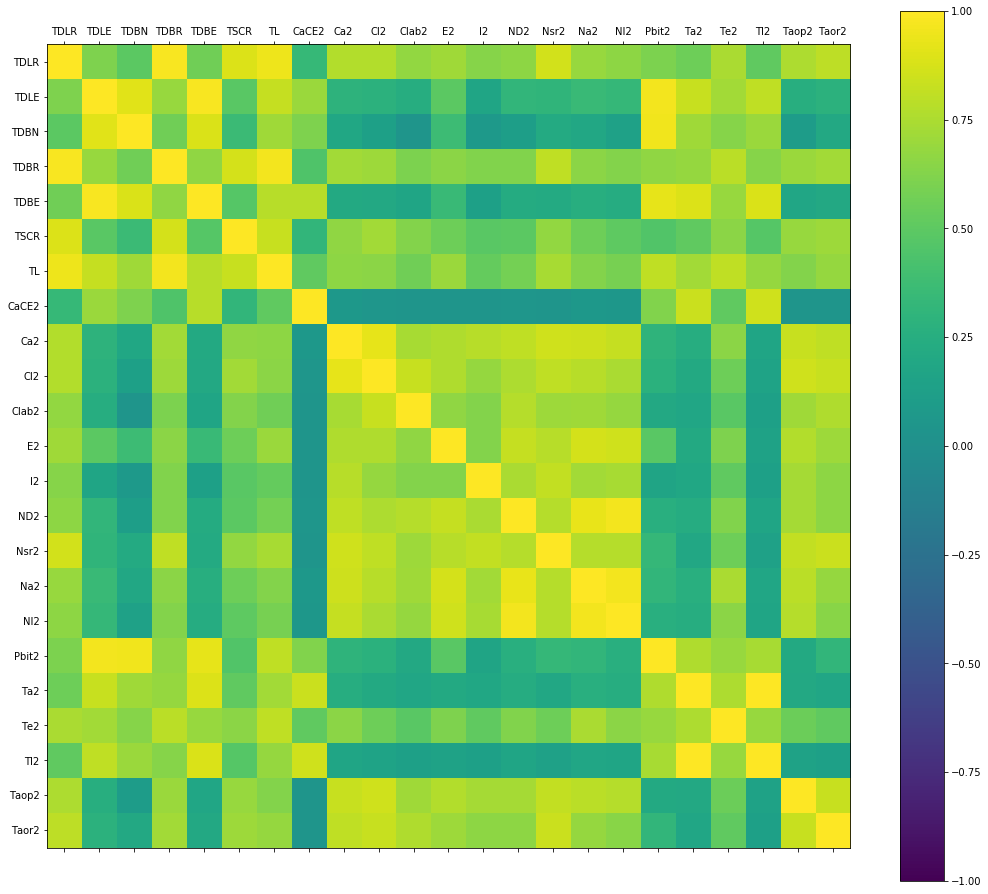

In [47]:
# Correlation matrix of all financial columns.
import matplotlib.pyplot as plt
%matplotlib inline
def Cor_Mat_Plot(df,names,figsize):
    """Plot correlation heat map with names as tick labels."""
    # import matplotlib.pyplot as plt
    correlations = df.corr()
    # plot correlation matrix
    fig = plt.figure(figsize=figsize, dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(list(df)),1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

all_col_names = list(df_total_liquidity_company_nonzero)
corr_col_list = all_col_names[9:16] + all_col_names[18:]
tick_names = [''.join([st[0] for st in col.split('_')]) for col in corr_col_list]
figsize = (18, 16)
#Have to convert all columns to float data type.
Cor_Mat_Plot(df_total_liquidity_company_nonzero[corr_col_list].astype(float),tick_names,figsize)

In [48]:
correlations = df_total_liquidity_company_nonzero[corr_col_list].astype(float).corr()
correlations

,Total_Deal_Liquidity_Rev,Total_Deal_Liquidity_EBIT,Total_Dividends_Buyback_NI,Total_Dividends_Buyback_Rev,Total_Dividends_Buyback_EBIT,Total_Stock_Compensation_Rev,Total_Liquidity,Cash_and_Cash_Equivalents_2016,Current_assets_2016,Current_liabilities_2016,...,Net_Debt_2016,Net_sales_revenue_2016,Non-current_assets_2016,Non-current_liabilities_2016,Profit_before_income_tax_2016,Total_assets_2016,Total_equity_2016,Total_liabilities_2016,Trade_and_other_payables_2016,Trade_and_other_receivables_2016
Total_Deal_Liquidity_Rev,1.000000,0.614791,0.496585,0.979635,0.565605,0.894971,0.952786,0.337526,0.768698,0.768458,...,0.659021,0.865522,0.693457,0.662727,0.607592,0.559679,0.744439,0.513093,0.751800,0.803577
Total_Deal_Liquidity_EBIT,0.614791,1.000000,0.912179,0.690115,0.978274,0.489720,0.823903,0.698003,0.290732,0.283741,...,0.319842,0.312166,0.358175,0.330897,0.962326,0.828676,0.722262,0.811693,0.256405,0.281547
Total_Dividends_Buyback_NI,0.496585,0.912179,1.000000,0.566964,0.884602,0.364843,0.717517,0.610826,0.192351,0.137050,...,0.122011,0.224514,0.197732,0.142273,0.953751,0.715732,0.633099,0.699794,0.106944,0.205953
Total_Dividends_Buyback_Rev,0.979635,0.690115,0.566964,1.000000,0.665826,0.872567,0.968434,0.449541,0.725973,0.708859,...,0.620587,0.806852,0.651210,0.628649,0.669953,0.681848,0.794322,0.640503,0.697127,0.725913
Total_Dividends_Buyback_EBIT,0.565605,0.978274,0.884602,0.665826,1.000000,0.473705,0.781431,0.786767,0.217901,0.206930,...,0.229500,0.225540,0.255146,0.237106,0.928127,0.891708,0.694183,0.884793,0.187164,0.207172
Total_Stock_Compensation_Rev,0.894971,0.489720,0.364843,0.872567,0.473705,1.000000,0.829004,0.316298,0.664261,0.719775,...,0.492784,0.675283,0.560380,0.502351,0.460060,0.510821,0.652760,0.471954,0.693581,0.710081
Total_Liquidity,0.952786,0.823903,0.717517,0.968434,0.781431,0.829004,1.000000,0.511254,0.661003,0.653597,...,0.583733,0.739654,0.625897,0.591470,0.809657,0.721068,0.812414,0.681121,0.631254,0.683175
Cash_and_Cash_Equivalents_2016,0.337526,0.698003,0.610826,0.449541,0.786767,0.316298,0.511254,1.000000,0.067082,0.047551,...,0.054513,0.044693,0.065941,0.056004,0.617399,0.842886,0.514894,0.855685,0.046543,0.041579
Current_assets_2016,0.768698,0.290732,0.192351,0.725973,0.217901,0.664261,0.661003,0.067082,1.000000,0.927854,...,0.806546,0.853576,0.845623,0.820555,0.297193,0.242283,0.655757,0.176483,0.829861,0.807765
Current_liabilities_2016,0.768458,0.283741,0.137050,0.708859,0.206930,0.719775,0.653597,0.047551,0.927854,1.000000,...,0.752256,0.807021,0.783504,0.744227,0.276341,0.212141,0.556239,0.156981,0.856454,0.835351


In [49]:
df_total_liquidity_company.to_pickle('../../Database/EMIS/preprocessed/shareholder_comp_info_20180522.pickle')
df_total_liquidity_company_nonzero.to_pickle('../../Database/EMIS/preprocessed/shareholder_comp_info_nonzero_liq_20180522.pickle')

In [1]:
import pandas as pd
df_total_liquidity_company = pd.read_pickle('../../Database/EMIS/preprocessed/shareholder_info_20180314.pickle')
df_total_liquidity_company_nonzero = pd.read_pickle('../../Database/EMIS/preprocessed/shareholder_info_nonzero_liq_20180314.pickle')

### When we try to save data to csv so that R can load those data, I have to delete some columns because they cannot be correctly separated. (Maybe use other delimiter can solve this problem)

### Solved: Just save the data to .xlsx format

In [84]:
r_delete_col = ['Shareholder', 'Company_Profile', 'Company_CNPJ', 'Company_Equity', 'Industry_List', 'NAICS_Num_List']
df_total_liquidity_company_to_R=copy.deepcopy(df_total_liquidity_company[
    [col for col in list(df_total_liquidity_company) if col not in r_delete_col]])
df_total_liquidity_company_to_R.rename((lambda x: ''.join([st[0] for st in x.split('_')])), axis='columns').to_csv(
    '../../Database/EMIS/preprocessed/shareholder_info_20180314.csv')
df_total_liquidity_company_nonzero_to_R=copy.deepcopy(df_total_liquidity_company_nonzero[
    [col for col in list(df_total_liquidity_company_nonzero) if col not in r_delete_col]])
df_total_liquidity_company_nonzero_to_R.rename((lambda x: ''.join([st[0] for st in x.split('_')])), axis='columns').to_csv(
    '../../Database/EMIS/preprocessed/shareholder_info_nonzero_liq_20180314.csv')

In [85]:
df_total_liquidity_company_to_R[:5]

,Shareholder_Name_Normalized,Company_Number,Industry_Number,Total_Deal_Liquidity_Rev,Total_Deal_Liquidity_EBIT,Total_Dividends_Buyback_NI,Total_Dividends_Buyback_Rev,Total_Dividends_Buyback_EBIT,Total_Stock_Compensation_Rev,Total_Liquidity
0,carvalho henrique joaquim,1,1,3.81651,0.140139,0.103546,0.463324,0.0170128,0.00340564,2.17636
1,marcelo neto silva,1,1,4.74055,-0.573961,-0.46875,0.892288,-0.108034,0.00210985,2.19057
2,norma rocha simoes,1,1,0,0,0,0,0,0,0
3,fernandes jose monteiro nercio,1,2,27.4594,3.90779,4.81173,2.58738,0.368214,0.0308416,18.3035
4,arantes douglas,1,1,0.256416,0.00814078,-0.0636131,0.0288088,0.00091463,0.000122232,0.121104


In [86]:
#df_total_liquidity_company_nonzero = pd.read_pickle('../../Database/EMIS/preprocessed/shareholder_info_nonzero_liq_20180314.pickle')

In [87]:
# Define a function to split data into training and testing data set.
def SplitTrainTest(df, X_col, y_col, train_ratio):
    """Split data into train and test data with train_ratio."""
    pos_idx = list(df[df["HNWC_10"]==1].index)
    neg_idx = list(df[df["HNWC_10"]==0].index)
    train_idx = np.random.choice(pos_idx, int(len(pos_idx)*train_ratio), replace=False)
    train_idx = np.concatenate((train_idx, np.random.choice(neg_idx, int(len(neg_idx)*train_ratio), replace=False)))
    test_idx = np.array([idx for idx in range(df.shape[0]) if idx not in train_idx])
    X_train = copy.deepcopy(df.loc[train_idx, X_col])
    X_test = copy.deepcopy(df.loc[test_idx, X_col])
    y_train = copy.deepcopy(df.loc[train_idx, y_col])
    y_test = copy.deepcopy(df.loc[test_idx, y_col])
    
    return (X_train, X_test, y_train, y_test)

### Regression

In [88]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

def LM_Summary(X_train, X_test, y_train, y_test, add_const=False):
    if add_const:
        X_train_1 = sm.add_constant(X_train)
        X_test_1 = sm.add_constant(X_test)
    else:
        X_train_1 = X_train
        X_test_1 = X_test
    model = sm.OLS(y_train.astype(float), X_train_1.astype(float)).fit()
    y_pred = model.predict(X_test_1.astype(float))
    print(model.summary())
    r2_pred = 1.0 - sum(y_test-y_pred)**2/sum((y_test-y_test.mean())**2)
    print("\nThe prediction R^2: %s\n" % (r2_pred,))
    return (r2_pred, y_pred)

def RegM0(p_train, pr_flag=0):
    # p_train Training data and (1-p_train) Testing data.
    X_col = ['_'.join([col, year]) for col in useful_fina_col]
    X_col.extend(['Company_Number', 'Industry_Number'])
    if pr_flag:
        print(X_col)
    y_col = 'Total_Liquidity'
    (X_train, X_test, y_train, y_test) = SplitTrainTest(df_total_liquidity_company_nonzero, X_col, y_col, p_train)
    r2_pred, y_pred = LM_Summary(X_train, X_test, y_train, y_test, add_const=True)

    #Classification based on regression results.
    (tr_pos, fa_pos, tr_neg, fa_neg) = (0.0, 0.0, 0.0, 0.0)
    for y_, y in zip(y_pred, y_test):
        if y_>10 and y>10:
            tr_pos += 1
        elif y_>10 and y<=10:
            fa_pos += 1
        elif y_<=10 and y>10:
            fa_neg += 1
        else:
            tr_neg += 1
    tr_pos /= y_test.shape[0]
    fa_pos /= y_test.shape[0]
    tr_neg /= y_test.shape[0]
    fa_neg /= y_test.shape[0]
    if pr_flag:
        print(" True Positive: %s\n False Positive: %s\n True Negative: %s\n False Negative: %s" % (
                tr_pos, fa_pos, tr_neg, fa_neg))
    return r2_pred

RegM0(0.7, pr_flag=1)

/Users/kungangzhang/anaconda/envs/py27/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


['Cash_and_Cash_Equivalents_2016', 'Current_assets_2016', 'Current_liabilities_2016', 'Current_loans_and_borrowings_2016', 'EBITDA_2016', 'Inventories_2016', 'Net_Debt_2016', 'Net_sales_revenue_2016', 'Non-current_assets_2016', 'Non-current_liabilities_2016', 'Profit_before_income_tax_2016', 'Total_assets_2016', 'Total_equity_2016', 'Total_liabilities_2016', 'Trade_and_other_payables_2016', 'Trade_and_other_receivables_2016', 'Company_Number', 'Industry_Number']
                            OLS Regression Results                            
Dep. Variable:        Total_Liquidity   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     1239.
Date:                Thu, 22 Mar 2018   Prob (F-statistic):               0.00
Time:                        05:59:33   Log-Likelihood:                -5063.9
No. Observations:                 900   AIC:               

-2.588975020558399

In [89]:
%%capture
# Repeat experiments.
N_ex = 50 # Number of experiments.
r2_pred_list = []
for i in range(N_ex):
    r2_pred_list.append(RegM0(0.7))

In [90]:
print(" Prediction R^2: %s\n Mean of prediction R^2: %s\n Std of prediction R^2: %s\n" % (
        r2_pred_list, np.mean(r2_pred_list), np.std(r2_pred_list)))

 Prediction R^2: [0.9270526429921765, 0.7887489105675598, -0.0984479248904837, 0.9736480477922527, 0.8738059099547084, 0.9528421279895545, 0.604724713757848, 0.7348785176714582, 0.8301897948103775, -0.8115984338898474, 0.9605216650946318, 0.5485626054754702, -0.26660837047101715, -10.228255569082126, 0.9970110395927165, 0.807144097765358, 0.5572085422968376, 0.9177745670352554, -0.8538704530993777, 0.021481879163872453, 0.12759655563453975, 0.9793795114516828, 0.9889286440566827, 0.6750304508356361, 0.7219364533342643, 0.9884485560448782, 0.9995050315927292, 0.8908345889871196, 0.9257851126568961, 0.6911215306288535, 0.9776050843597452, 0.6189014751892006, 0.9409676297120596, 0.9915783928776789, 0.9234527118216724, 0.0815683053794014, -0.24019003194385702, 0.76015879501008, 0.8337584397079346, 0.9244047895878922, 0.9707940442663855, -0.4158282426573925, 0.8670676602190245, -1.1813763763445024, 0.7266165624725962, 0.7405672342162268, 0.7609967468414729, 0.962998945696134, 0.940391787813

In [91]:
%%capture
# Repeat experiments.
N_ex = 50 # Number of experiments.
r2_pred_list = []
for i in range(N_ex):
    r2_pred_list.append(RegM0(0.8))

In [92]:
print(" Prediction R^2: %s\n Mean of prediction R^2: %s\n Std of prediction R^2: %s\n" % (
        r2_pred_list, np.mean(r2_pred_list), np.std(r2_pred_list)))

 Prediction R^2: [0.889001513384424, 0.878597725618876, 0.995049691303668, 0.8577627890247016, 0.99920500219154, -0.6120573734640482, 0.998978715278649, 0.3667037228004506, 0.5382926503020851, -0.8587864964534979, 0.040090983660292845, -0.060080241280892954, 0.9793499626812339, 0.4290705407863893, 0.8113371276211394, 0.6807903944922524, -0.2597083175204784, 0.7138308355791216, 0.09849683806367948, -0.08530604007936105, 0.8680691431586132, 0.9360782317544114, 0.6717152507232546, -1.2068215581973956, 0.8021949442853723, 0.8200137200957974, 0.8900452838489687, 0.7345921214927553, 0.7794778387338589, 0.6329176343783844, 0.8252193871099597, -1.2385909061486506, 0.9467309250978161, 0.9840400747817802, -0.6109901369574999, -2.61868626851169, 0.9575136284753503, 0.685256949364698, 0.9960095467425183, 0.9981850827711931, -1.8008334341744114, -0.2386046468559735, 0.3695707491850515, -1.5083401677852422, 0.3103175945256741, 0.8399725755195715, 0.5923168299829331, 0.7656382926902754, 0.74669518558

In [93]:
# 60% Training data and 40% Testing data. (I tried using 50% Training data, but prediction R^2 is bad.)
X_col = ['_'.join([col, year]) for col in useful_fina_col]
X_col.extend(['Company_Number', 'Industry_Number'])
print(X_col)
y_col = 'Total_Liquidity'
(X_train, X_test, y_train, y_test) = SplitTrainTest(df_total_liquidity_company_nonzero, X_col, y_col, 0.6)

['Cash_and_Cash_Equivalents_2016', 'Current_assets_2016', 'Current_liabilities_2016', 'Current_loans_and_borrowings_2016', 'EBITDA_2016', 'Inventories_2016', 'Net_Debt_2016', 'Net_sales_revenue_2016', 'Non-current_assets_2016', 'Non-current_liabilities_2016', 'Profit_before_income_tax_2016', 'Total_assets_2016', 'Total_equity_2016', 'Total_liabilities_2016', 'Trade_and_other_payables_2016', 'Trade_and_other_receivables_2016', 'Company_Number', 'Industry_Number']


In [94]:
_, y_pred = LM_Summary(X_train, X_test, y_train, y_test, add_const=True)

#Classification based on regression results.
(tr_pos, fa_pos, tr_neg, fa_neg) = (0.0, 0.0, 0.0, 0.0)
for y_, y in zip(y_pred, y_test):
    if y_>10 and y>10:
        tr_pos += 1
    elif y_>10 and y<=10:
        fa_pos += 1
    elif y_<=10 and y>10:
        fa_neg += 1
    else:
        tr_neg += 1
tr_pos /= y_test.shape[0]
fa_pos /= y_test.shape[0]
tr_neg /= y_test.shape[0]
fa_neg /= y_test.shape[0]
print(" True Positive: %s\n False Positive: %s\n True Negative: %s\n False Negative: %s" % (
        tr_pos, fa_pos, tr_neg, fa_neg))

                            OLS Regression Results                            
Dep. Variable:        Total_Liquidity   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1269.
Date:                Thu, 22 Mar 2018   Prob (F-statistic):               0.00
Time:                        05:59:38   Log-Likelihood:                -4440.7
No. Observations:                 771   AIC:                             8919.
Df Residuals:                     752   BIC:                             9008.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [95]:
# Delete some non-significant variables.
def RegM01(p_train):
    # p_train Training data and (1-p_train) Testing data.
    non_sig_col = ['Total_assets_2016','Total_equity_2016','Total_liabilities_2016','Company_Number','Industry_Number']
    X_col_new = [col for col in X_col if col not in non_sig_col]
    print(X_col)
    y_col = 'Total_Liquidity'
    (X_train, X_test, y_train, y_test) = SplitTrainTest(df_total_liquidity_company_nonzero, X_col_new, y_col, p_train)

    r2_pred, y_pred = LM_Summary(X_train, X_test, y_train, y_test, add_const=True)

    #Classification based on regression results.
    (tr_pos, fa_pos, tr_neg, fa_neg) = (0.0, 0.0, 0.0, 0.0)
    for y_, y in zip(y_pred, y_test):
        if y_>10 and y>10:
            tr_pos += 1
        elif y_>10 and y<=10:
            fa_pos += 1
        elif y_<=10 and y>10:
            fa_neg += 1
        else:
            tr_neg += 1
    tr_pos /= y_test.shape[0]
    fa_pos /= y_test.shape[0]
    tr_neg /= y_test.shape[0]
    fa_neg /= y_test.shape[0]
    print(" True Positive: %s\n False Positive: %s\n True Negative: %s\n False Negative: %s" % (
            tr_pos, fa_pos, tr_neg, fa_neg))
    return r2_pred

RegM01(0.7)

['Cash_and_Cash_Equivalents_2016', 'Current_assets_2016', 'Current_liabilities_2016', 'Current_loans_and_borrowings_2016', 'EBITDA_2016', 'Inventories_2016', 'Net_Debt_2016', 'Net_sales_revenue_2016', 'Non-current_assets_2016', 'Non-current_liabilities_2016', 'Profit_before_income_tax_2016', 'Total_assets_2016', 'Total_equity_2016', 'Total_liabilities_2016', 'Trade_and_other_payables_2016', 'Trade_and_other_receivables_2016', 'Company_Number', 'Industry_Number']
                            OLS Regression Results                            
Dep. Variable:        Total_Liquidity   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     1615.
Date:                Thu, 22 Mar 2018   Prob (F-statistic):               0.00
Time:                        05:59:39   Log-Likelihood:                -5210.4
No. Observations:                 900   AIC:               

0.60847431830787

In [96]:
%%capture
# Repeat experiments.
N_ex = 50 # Number of experiments.
r2_pred_list = []
for i in range(N_ex):
    r2_pred_list.append(RegM01(0.8))

In [97]:
print(" Prediction R^2: %s\n Mean of prediction R^2: %s\n Std of prediction R^2: %s\n" % (
        r2_pred_list, np.mean(r2_pred_list), np.std(r2_pred_list)))

 Prediction R^2: [-3.214858222984277, 0.9783308419275962, -0.19727971453645177, 0.9689003814248293, 0.7424253427351832, 0.9189580133716503, 0.3989943493251943, 0.28313350393113135, 0.873104312217964, 0.9094411233768834, -1.7884113193128184, -0.2753713825146371, 0.5179416624129107, 0.988149355500039, 0.7267766672213172, 0.9035111966444486, 0.9648963114507609, 0.7551911720793574, 0.764663763624423, 0.5673244107365628, 0.8842437733581184, 0.8153297543580038, 0.8219638704483547, 0.9989450216652034, 0.6518208522299807, 0.9623450744309175, 0.9670203284162578, -1.7452918110887432, 0.9679507909256739, -1.0427016227611685, 0.9156494647430695, 0.8893875207388897, 0.9756620401420995, 0.9761930273548005, -3.468719833963343, 0.6445265113081109, 0.9486258036529134, 0.6692403655249791, -3.0781397957058463, 0.9610089376412502, -1.8248054208334894, -3.503847600742861, -0.08847400754880663, 0.2681174292119137, 0.852212101954809, 0.09009457564664047, 0.9747393335699283, 0.8248692630864158, 0.999921878481

### Use those columns we used to calculate the ground truth to do regression. We expect there would be no fitting error.

In [98]:
X_col = [col for col in list(df_total_liquidity_company_nonzero)[9:15]]
X_col.extend(['Company_Number', 'Industry_Number'])
print(X_col)
y_col = 'Total_Liquidity'
(X_train, X_test, y_train, y_test) = SplitTrainTest(df_total_liquidity_company_nonzero, X_col, y_col, 0.7)

['Total_Deal_Liquidity_Rev', 'Total_Deal_Liquidity_EBIT', 'Total_Dividends_Buyback_NI', 'Total_Dividends_Buyback_Rev', 'Total_Dividends_Buyback_EBIT', 'Total_Stock_Compensation_Rev', 'Company_Number', 'Industry_Number']


In [99]:
_, y_pred = LM_Summary(X_train, X_test, y_train, y_test, add_const=False)

#Classification based on regression results.
(tr_pos, fa_pos, tr_neg, fa_neg) = (0.0, 0.0, 0.0, 0.0)
for y_, y in zip(y_pred, y_test):
    if y_>10 and y>10:
        tr_pos += 1
    elif y_>10 and y<=10:
        fa_pos += 1
    elif y_<=10 and y>10:
        fa_neg += 1
    else:
        tr_neg += 1
tr_pos /= y_test.shape[0]
fa_pos /= y_test.shape[0]
tr_neg /= y_test.shape[0]
fa_neg /= y_test.shape[0]
print(" True Positive: %s\n False Positive: %s\n True Negative: %s\n False Negative: %s" % (
        tr_pos, fa_pos, tr_neg, fa_neg))

                            OLS Regression Results                            
Dep. Variable:        Total_Liquidity   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.472e+31
Date:                Thu, 22 Mar 2018   Prob (F-statistic):               0.00
Time:                        05:59:44   Log-Likelihood:                 23490.
No. Observations:                 900   AIC:                        -4.696e+04
Df Residuals:                     892   BIC:                        -4.692e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Total_Deal_Liqui

#### Indeed, using those columns gives no fitting error.

### Classification

In [100]:
X_col = ['_'.join([col, year]) for col in useful_fina_col]
X_col.extend(['Company_Number', 'Industry_Number'])
print(X_col)
y_col = 'HNWC_10'
(X_train, X_test, y_train, y_test) = SplitTrainTest(df_total_liquidity_company_nonzero, X_col, y_col, 0.7)

['Cash_and_Cash_Equivalents_2016', 'Current_assets_2016', 'Current_liabilities_2016', 'Current_loans_and_borrowings_2016', 'EBITDA_2016', 'Inventories_2016', 'Net_Debt_2016', 'Net_sales_revenue_2016', 'Non-current_assets_2016', 'Non-current_liabilities_2016', 'Profit_before_income_tax_2016', 'Total_assets_2016', 'Total_equity_2016', 'Total_liabilities_2016', 'Trade_and_other_payables_2016', 'Trade_and_other_receivables_2016', 'Company_Number', 'Industry_Number']


In [101]:
from sklearn import metrics
from scipy import stats
# Workaround for error: AttributeError: 'module' object has no attribute 'chisqprob'
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df) 
def LogM_Summary(X_train, X_test, y_train, y_test, add_const=False):
    if add_const:
        X_train_1 = sm.add_constant(X_train)
        X_test_1 = sm.add_constant(X_test)
    else:
        X_train_1 = X_train
        X_test_1 = X_test
    model = sm.Logit(y_train.astype(int), X_train_1.astype(float)).fit()
    y_pred = model.predict(X_test_1.astype(float))
    print(model.summary())
    score = metrics.accuracy_score(y_test.astype(int), y_pred.astype(int))
    print("\nThe prediction accuracy (score function from sklearn): %s\n" % (score,))
    acc = 1.0*sum((y_pred.astype(int) == y_test.astype(int)).astype(int))/y_test.shape[0]
    print("\nThe prediction accuracy: %s\n" % (acc,))
    return y_pred

y_pred = LogM_Summary(X_train, X_test, y_train, y_test, add_const=True)

Optimization terminated successfully.
         Current function value: 0.155317
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:                HNWI_10   No. Observations:                  900
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                           18
Date:                Thu, 22 Mar 2018   Pseudo R-squ.:                  0.7748
Time:                        05:59:49   Log-Likelihood:                -139.79
converged:                       True   LL-Null:                       -620.79
                                        LLR p-value:                9.173e-193
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -8.7137      1.647     -

In [102]:
# Borrow from http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html
import scipy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics

# #############################################################################
# Benchmark classifiers
def benchmark(clf, X_train, y_train, X_test, y_test, feature_names=None):
    """Run a classifier and print results."""
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))
        print("intercept: %s" % (clf.intercept_, ))
        print("coef: %s" % (clf.coef_, ))

        if feature_names is not None:
            print("top 10 keywords per class:")
            #for i, label in enumerate(['negative', 'positive']):
            top10 = np.argsort(clf.coef_[0])[-10:]
            print("%s: %s" % ("Positive", " ".join(feature_names[top10])))
        print()

    print("classification report:")
    print(metrics.classification_report(y_test, pred, target_names=["negative", "positive"]))

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time


def TryClassifiers(X_train, y_train, X_test, y_test, feature_names=None):
    results = []
    # UserWarning: In Ridge, only 'sag' solver can currently fit the intercept when X is sparse.
    # Solver has been automatically changed into 'sag'.
    for clf, name in (
            (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"), # Solver cannot be 'lsqr'; can only be 'sag'
            (Perceptron(max_iter=50), "Perceptron"),
            (PassiveAggressiveClassifier(max_iter=50), "Passive-Aggressive"),
            (KNeighborsClassifier(n_neighbors=10), "kNN"),
            (RandomForestClassifier(n_estimators=100), "Random Forest"),
            (LogisticRegression(), "Logistic Regression")):
        print('=' * 80)
        print(name)
        results.append(benchmark(clf, X_train, y_train, X_test, y_test, feature_names))

    for penalty in ["l2", "l1"]:
        print('=' * 80)
        print("%s penalty" % penalty.upper())
        # Train Liblinear model
        results.append(benchmark(LinearSVC(penalty=penalty, dual=False,
                                           tol=1e-3), 
                                 X_train, y_train, X_test, y_test, feature_names))

        # Train SGD model
        results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50, penalty=penalty),
                                 X_train, y_train, X_test, y_test, feature_names))

    # Train SGD with Elastic Net penalty
    print('=' * 80)
    print("Elastic-Net penalty")
    results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50, penalty="elasticnet"),
                             X_train, y_train, X_test, y_test, feature_names))

    # Train NearestCentroid without threshold
    print('=' * 80)
    print("NearestCentroid (aka Rocchio classifier)")
    results.append(benchmark(NearestCentroid(), 
                             X_train, y_train, X_test, y_test, feature_names))

#     flag_positive_features = 1
#     for sample in X_train:
#         if scipy.sparse.issparse(sample): # Word2Vec response is not a scipy.sparse; Tfidf response is a scipy.sparse
#             if any(sample.data<0):# For scipy.sparse matrix, the vector elements are stored in the field "data"
#                 flag_positive_features = 0
#                 break;
#         else:
#             if any(sample<0):
#                 flag_positive_features = 0
#                 break;
        
    
#     if flag_positive_features:
#         # Train sparse Naive Bayes classifiers (require non-negative X_train (ValueError: Input X must be non-negative))
#         print('=' * 80)
#         print("Naive Bayes")
#         results.append(benchmark(MultinomialNB(alpha=.01),
#                                  X_train, y_train, X_test, y_test, feature_names))
#         results.append(benchmark(BernoulliNB(alpha=.01),
#                                  X_train, y_train, X_test, y_test, feature_names))

    print('=' * 80)
    print("LinearSVC with L1-based feature selection")
    # The smaller C, the stronger the regularization.
    # The more regularization, the more sparsity.
    results.append(benchmark(Pipeline([
      ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False, tol=1e-3))),
      ('classification', LinearSVC(penalty="l2"))]), X_train, y_train, X_test, y_test, feature_names))

    # make some plots
    
    indices = np.arange(len(results))

    results = [[x[i] for x in results] for i in range(4)]

    clf_names, score, training_time, test_time = results
    training_time = np.array(training_time) / np.max(training_time)
    test_time = np.array(test_time) / np.max(test_time)

    plt.figure(figsize=(12, 8))
    plt.title("Score")
    plt.barh(indices, score, .2, label="score", color='navy')
    plt.barh(indices + .3, training_time, .2, label="training time",
             color='c')
    plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
    plt.yticks(())
    plt.legend(loc='best')
    plt.subplots_adjust(left=.25)
    plt.subplots_adjust(top=.95)
    plt.subplots_adjust(bottom=.05)

    for i, c in zip(indices, clf_names):
        plt.text(-.3, i, c)

    plt.show()
    return results

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='sag',
        tol=0.01)
train time: 0.025s
test time:  0.001s
accuracy:   0.540
dimensionality: 18
density: 1.000000
intercept: [0.0276181]
coef: [[-7.52690828e-05  1.99955590e-04  1.22924264e-04  4.36993728e-05
   3.57967565e-05  5.49043327e-05  7.99463923e-05  3.06894301e-04
   9.74013546e-05  1.34427044e-04  1.53996390e-05  4.43777638e-05
   3.62710685e-05  8.21504482e-06  5.36011787e-05  7.13466504e-05
   2.49164144e-07  6.38053343e-07]]
()
classification report:
             precision    recall  f1-score   support

   negative       0.00      0.00      0.00       178
   positive       0.54      1.00      0.70       209

avg / total       0.29      0.54      0.38       387

confusion matrix:
[[  0 178]
 [  0 209]]
()
Perceptron
___

/Users/kungangzhang/anaconda/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


train time: 0.334s
test time:  0.012s
accuracy:   0.956
classification report:
             precision    recall  f1-score   support

   negative       0.94      0.97      0.95       178
   positive       0.98      0.94      0.96       209

avg / total       0.96      0.96      0.96       387

confusion matrix:
[[173   5]
 [ 12 197]]
()
Logistic Regression
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
train time: 0.031s
test time:  0.001s
accuracy:   0.935
dimensionality: 18
density: 1.000000
intercept: [-3.70893414]
coef: [[ 0.01166349  0.2457513  -0.11601897 -0.16858433  0.01545515 -0.22049437
   0.10564355  0.33859137  0.10001616 -0.13536706  0.71291795 -0.02192409
  -0.10703199

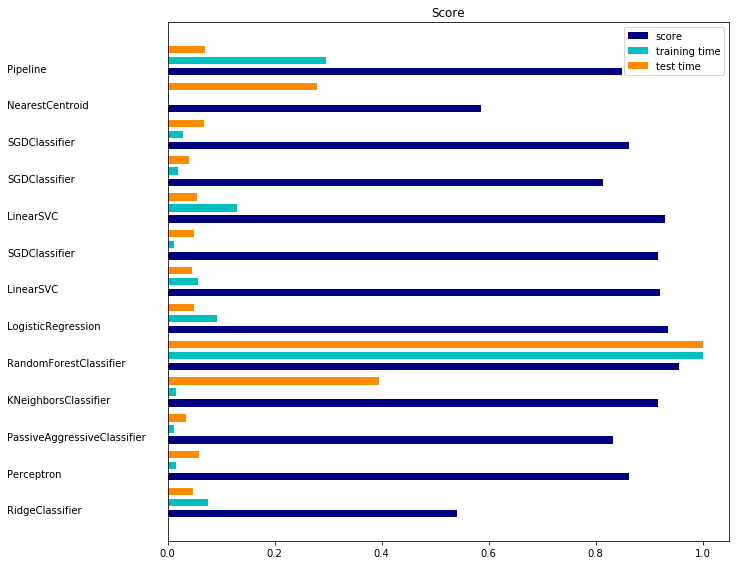

[['RidgeClassifier',
  'Perceptron',
  'PassiveAggressiveClassifier',
  'KNeighborsClassifier',
  'RandomForestClassifier',
  'LogisticRegression',
  'LinearSVC',
  'SGDClassifier',
  'LinearSVC',
  'SGDClassifier',
  'SGDClassifier',
  'NearestCentroid',
  'Pipeline'],
 [0.5400516795865633,
  0.8630490956072352,
  0.8320413436692506,
  0.917312661498708,
  0.9560723514211886,
  0.9354005167958657,
  0.9198966408268734,
  0.917312661498708,
  0.9302325581395349,
  0.813953488372093,
  0.8630490956072352,
  0.58656330749354,
  0.8501291989664083],
 [0.02490401268005371,
  0.005375862121582031,
  0.004054069519042969,
  0.005063056945800781,
  0.3338658809661865,
  0.03057408332824707,
  0.01913285255432129,
  0.00424504280090332,
  0.043540000915527344,
  0.00616002082824707,
  0.009798049926757812,
  0.0010929107666015625,
  0.09906816482543945],
 [0.0005450248718261719,
  0.0006859302520751953,
  0.00039196014404296875,
  0.0045850276947021484,
  0.011610031127929688,
  0.000577926635

In [103]:
TryClassifiers(X_train, y_train, X_test, y_test, feature_names=None)

In [104]:
X_col = ['_'.join([col, year]) for col in useful_fina_col]
X_col.extend(['Company_Number', 'Industry_Number'])
print(X_col)
y_col = 'HNWC_10'
(X_train, X_test, y_train, y_test) = SplitTrainTest(df_total_liquidity_company_nonzero, X_col, y_col, 0.5)

['Cash_and_Cash_Equivalents_2016', 'Current_assets_2016', 'Current_liabilities_2016', 'Current_loans_and_borrowings_2016', 'EBITDA_2016', 'Inventories_2016', 'Net_Debt_2016', 'Net_sales_revenue_2016', 'Non-current_assets_2016', 'Non-current_liabilities_2016', 'Profit_before_income_tax_2016', 'Total_assets_2016', 'Total_equity_2016', 'Total_liabilities_2016', 'Trade_and_other_payables_2016', 'Trade_and_other_receivables_2016', 'Company_Number', 'Industry_Number']


Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='sag',
        tol=0.01)
train time: 0.013s
test time:  0.001s
accuracy:   0.880
dimensionality: 18
density: 1.000000
intercept: [-0.02242339]
coef: [[-2.91647222e-04  1.89181510e-04  1.08808706e-04  1.64369747e-05
   1.17330284e-04  2.84292294e-04  1.65242377e-04  1.00656345e-03
  -3.84737179e-04 -3.73212297e-04  1.92159061e-04  3.19077222e-04
   1.27568717e-04  1.92374052e-04  1.54457655e-04  3.39986889e-04
   1.64074867e-06  5.32589029e-06]]
()
classification report:
             precision    recall  f1-score   support

   negative       0.83      0.94      0.88       296
   positive       0.94      0.83      0.88       348

avg / total       0.89      0.88      0.88       644

confusion matrix:
[[277  19]
 [ 58 290]]
()
Perceptron
_

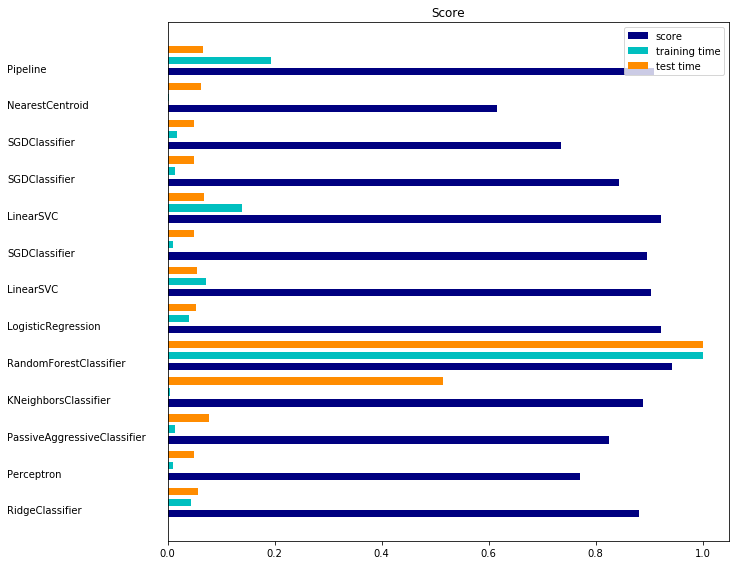

[['RidgeClassifier',
  'Perceptron',
  'PassiveAggressiveClassifier',
  'KNeighborsClassifier',
  'RandomForestClassifier',
  'LogisticRegression',
  'LinearSVC',
  'SGDClassifier',
  'LinearSVC',
  'SGDClassifier',
  'SGDClassifier',
  'NearestCentroid',
  'Pipeline'],
 [0.8804347826086957,
  0.7701863354037267,
  0.8245341614906833,
  0.8881987577639752,
  0.9425465838509317,
  0.922360248447205,
  0.9037267080745341,
  0.8959627329192547,
  0.922360248447205,
  0.843167701863354,
  0.7360248447204969,
  0.6164596273291926,
  0.9099378881987578],
 [0.012998819351196289,
  0.002725839614868164,
  0.0038940906524658203,
  0.0010218620300292969,
  0.2947850227355957,
  0.01149296760559082,
  0.02116680145263672,
  0.0026750564575195312,
  0.0410308837890625,
  0.004271030426025391,
  0.005133867263793945,
  0.0006690025329589844,
  0.05709719657897949],
 [0.0006000995635986328,
  0.0005240440368652344,
  0.0008251667022705078,
  0.00551605224609375,
  0.010702133178710938,
  0.000574827

In [105]:
TryClassifiers(X_train, y_train, X_test, y_test, feature_names=None)

## Train a prediction model without equity weighting.
Previous model based on data using equity information. However, for lots of shareholders, we don't have equity information. We train a model without using equity information.

In [50]:
import copy

In [51]:
# Select those shareholders having liquidity value
# This is to build a dataframe with financial information not weighted by equity information. However, here for
# simplicity, I still used those shareholders who have equity information. Actually, we should have much more 
# shareholders if we don't care whether they have equity information, but here it is just for a proof-of-concept.
df_total_liquidity_company_nonzero1 = copy.deepcopy(
    df_total_liquidity_company[df_total_liquidity_company["Total_Liquidity"]>0])
df_total_liquidity_company_nonzero1.reset_index(drop=True,inplace=True)

df_total_liquidity_company_nonzero1["HNWC_1"] = 0
df_total_liquidity_company_nonzero1["HNWC_10"] = 0
for idx, row in df_total_liquidity_company_nonzero1.iterrows():
    if row["Total_Liquidity"]>10:
        df_total_liquidity_company_nonzero1.at[idx,"HNWC_10"] = 1
    if row["Total_Liquidity"]>1:
        df_total_liquidity_company_nonzero1.at[idx,"HNWC_1"] = 1
print(df_total_liquidity_company_nonzero1[df_total_liquidity_company_nonzero1["HNWC_10"]==1].shape[0],
      df_total_liquidity_company_nonzero1[df_total_liquidity_company_nonzero1["HNWC_1"]==1].shape[0],
      df_total_liquidity_company_nonzero1.shape[0])

(1453, 1690, 1753)


In [76]:
# Define a function to copy the corresponding financial information from df_fina_info.
# Since a most majority of people own only one company, I expect this new model would not differ much from previous one.
def CopyFinaInfoNotUseEquity(col_list, df_src, df_des, year):
    """Copy financial information in col_list from df_src to df_des for corresponding year for each person.
       The contribution from different company are weighted by the equity."""
    # import copy
    for col in col_list:
        df_des['_'.join([col, year])] = 0.0 # No such financial information, assign 0.
    for idx, row in df_des.iterrows():
        for cnpj in row["Company_CNPJ"].split(';'):
            for col in col_list:
                contrib = df_src[df_src["CNPJ"]==cnpj][col, year].item()
                if not np.isnan(contrib):
                    df_des.at[idx, '_'.join([col, year])] += contrib

In [77]:
CopyFinaInfoNotUseEquity(useful_fina_col, df_fina_info, df_total_liquidity_company_nonzero1, '2016')

In [78]:
df_total_liquidity_company_nonzero1[:5]

,Shareholder,Shareholder_Name_Normalized,Company_Profile,Company_CNPJ,Company_Equity,Company_Number,Industry_List,NAICS_Num_List,Industry_Number,Total_Deal_Liquidity_Rev,...,Net_Debt_2016,Net_sales_revenue_2016,Non-current_assets_2016,Non-current_liabilities_2016,Profit_before_income_tax_2016,Total_assets_2016,Total_equity_2016,Total_liabilities_2016,Trade_and_other_payables_2016,Trade_and_other_receivables_2016
0,Gavea Investimentos Ltda.,gavea investimentos ltd,Terra Santa Agro S.A.,05799312000120,05799312000120(14.03%),1,Sugarcane Farming,11193,1,31.7452,...,214.45,241.82,508.50,202.43,-47.12,645.05,300.00,345.05,99.48,9.75
1,Lynx Portifolio LLC,llc lynx portifolio,Metalurgica Gerdau S.A.,92690783000109,92690783000109(3.3%),1,Foundries,3315,1,452.599,...,4667.38,10810.06,11305.67,6860.66,-818.89,16803.42,7166.55,9636.87,1263.95,1662.03
2,Bastos-Adm. De Bens E Partic. Ltda.,adm bastos bens de e ltd partic,Eliane S.A. - Revestimentos Ceramicos,86532538000162,86532538000162(10.01%),1,Nonmetallic Mineral Product Manufacturing,327,1,25.5517,...,67.46,202.43,114.10,107.34,9.85,263.60,66.43,197.17,28.63,61.14
3,Artur Eberhardt S.A.,artur eberhardt s.a.,Industrias Arteb S.A. Em Recuperacao Judicial ...,62291380000118,62291380000118(40.5%),1,Motor Vehicle Parts Manufacturing,3363,1,33.9207,...,11.68,66.42,56.49,163.42,-26.58,82.75,-132.93,215.68,6.32,15.51
4,Fb Participacoes S/A,fb participacoes s.a.,Vigor Alimentos S.A.,13324184000197,13324184000197(72.35%),1,Food Manufacturing ; Management of Companies a...,311;55,2,1677.53,...,127.22,1414.88,883.31,362.15,5.71,1409.21,614.53,794.68,201.03,117.78


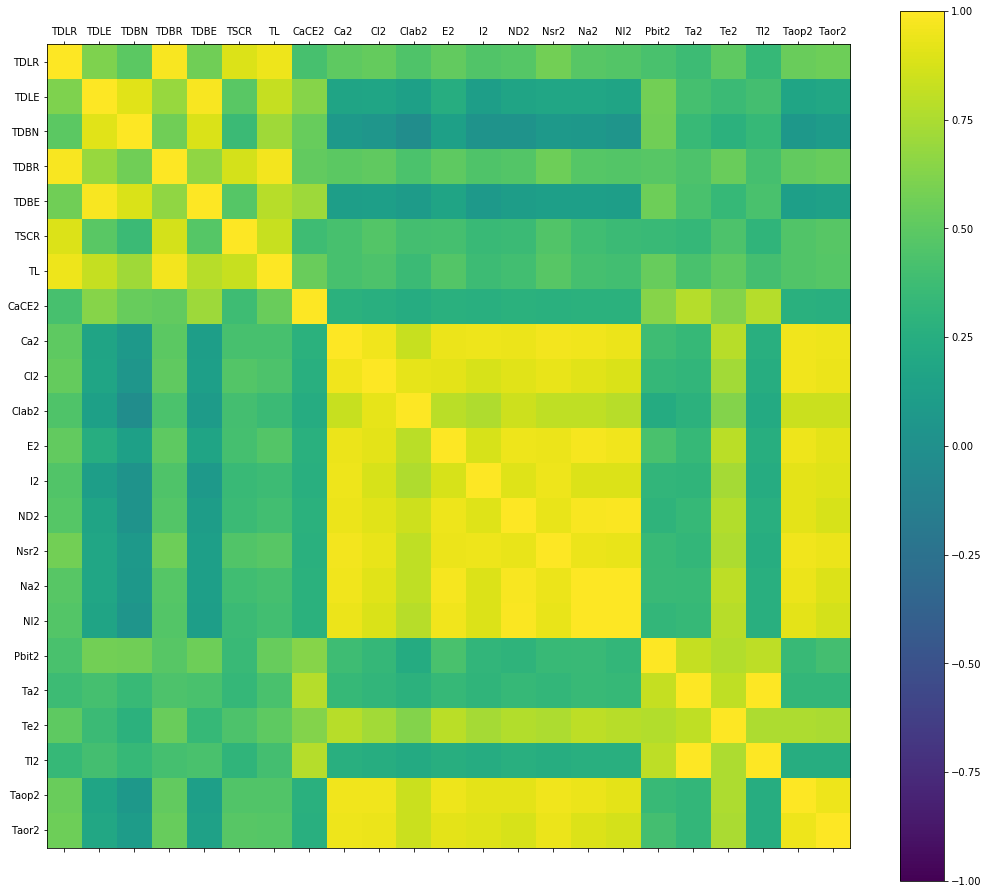

In [79]:
#Have to convert all columns to float data type.
Cor_Mat_Plot(df_total_liquidity_company_nonzero1[corr_col_list].astype(float),tick_names,figsize)

In [110]:
def RegM1(p_train, pr_flag=0):
    # p_train Training data and (1-p_train) Testing data (p_train: the portion of training data set).
    X_col = ['_'.join([col, year]) for col in useful_fina_col]
    X_col.extend(['Company_Number', 'Industry_Number'])
    if pr_flag:
        print(X_col)
    y_col = 'Total_Liquidity'
    (X_train, X_test, y_train, y_test) = SplitTrainTest(df_total_liquidity_company_nonzero1, X_col, y_col, p_train)

    r2_pred, y_pred = LM_Summary(X_train, X_test, y_train, y_test, add_const=True)

    #Classification based on regression results.
    (tr_pos, fa_pos, tr_neg, fa_neg) = (0.0, 0.0, 0.0, 0.0)
    for y_, y in zip(y_pred, y_test):
        if y_>10 and y>10:
            tr_pos += 1
        elif y_>10 and y<=10:
            fa_pos += 1
        elif y_<=10 and y>10:
            fa_neg += 1
        else:
            tr_neg += 1
    tr_pos /= y_test.shape[0]
    fa_pos /= y_test.shape[0]
    tr_neg /= y_test.shape[0]
    fa_neg /= y_test.shape[0]
    if pr_flag:
        print(" True Positive: %s\n False Positive: %s\n True Negative: %s\n False Negative: %s" % (
                tr_pos, fa_pos, tr_neg, fa_neg))
    return r2_pred

RegM1(0.7, pr_flag=1)

['Cash_and_Cash_Equivalents_2016', 'Current_assets_2016', 'Current_liabilities_2016', 'Current_loans_and_borrowings_2016', 'EBITDA_2016', 'Inventories_2016', 'Net_Debt_2016', 'Net_sales_revenue_2016', 'Non-current_assets_2016', 'Non-current_liabilities_2016', 'Profit_before_income_tax_2016', 'Total_assets_2016', 'Total_equity_2016', 'Total_liabilities_2016', 'Trade_and_other_payables_2016', 'Trade_and_other_receivables_2016', 'Company_Number', 'Industry_Number']
                            OLS Regression Results                            
Dep. Variable:        Total_Liquidity   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     32.55
Date:                Thu, 22 Mar 2018   Prob (F-statistic):           7.51e-85
Time:                        06:00:45   Log-Likelihood:                -6333.2
No. Observations:                 900   AIC:               

0.9336876325919532

In [111]:
%%capture
N_ex = 20 # Number of experiments
r2_pred_list = []
for i in range(N_ex):
    r2_pred_list.append(RegM1(0.8))

In [112]:
print(" Prediction R^2: %s\n Mean of prediction R^2: %s\n Std of prediction R^2: %s\n" % (
        r2_pred_list, np.mean(r2_pred_list), np.std(r2_pred_list)))

 Prediction R^2: [-0.7793694261154835, 0.5855263715960495, -7.319263614630556, 0.8567917391516076, 0.007133381224708635, -0.42075537866879253, -37.64013845080855, 0.20162873117199598, -2.7519763925634244, -6.3892432724326556, 0.052142377089528846, 0.38546516173053524, -1.698166533735415, 0.9724993195089623, -0.00037415021458397923, -5.371869370470751, 0.1001573618020255, 0.564520103680532, 0.7551404406534685, 0.534528541366364]
 Mean of prediction R^2: -2.8677811530332216
 Std of prediction R^2: 8.337231677857671



#### Without equity information, the regression part is very bad. We have to get a good way to estimate equity information.

### Classification

In [113]:
def ClaM1(p_train):
    # p_train Training data and (1-p_train) Testing data (p_train: the portion of training data set).
    X_col = ['_'.join([col, year]) for col in useful_fina_col]
    X_col.extend(['Company_Number', 'Industry_Number'])
    print(X_col)
    y_col = 'HNWC_10'
    (X_train, X_test, y_train, y_test) = SplitTrainTest(df_total_liquidity_company_nonzero1, X_col, y_col, p_train)

    res_pred = TryClassifiers(X_train, y_train, X_test, y_test, feature_names=None)
    return res_pred

['Cash_and_Cash_Equivalents_2016', 'Current_assets_2016', 'Current_liabilities_2016', 'Current_loans_and_borrowings_2016', 'EBITDA_2016', 'Inventories_2016', 'Net_Debt_2016', 'Net_sales_revenue_2016', 'Non-current_assets_2016', 'Non-current_liabilities_2016', 'Profit_before_income_tax_2016', 'Total_assets_2016', 'Total_equity_2016', 'Total_liabilities_2016', 'Trade_and_other_payables_2016', 'Trade_and_other_receivables_2016', 'Company_Number', 'Industry_Number']
Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='sag',
        tol=0.01)
train time: 0.029s
test time:  0.001s
accuracy:   0.703
dimensionality: 18
density: 1.000000
intercept: [-0.04219841]
coef: [[ 1.99996368e-04  1.42981654e-05 -8.00135576e-05  3.83106905e-04
   2.17553101e-04  1.46769079e-04  1.26355960e-04  9.91173567e-0

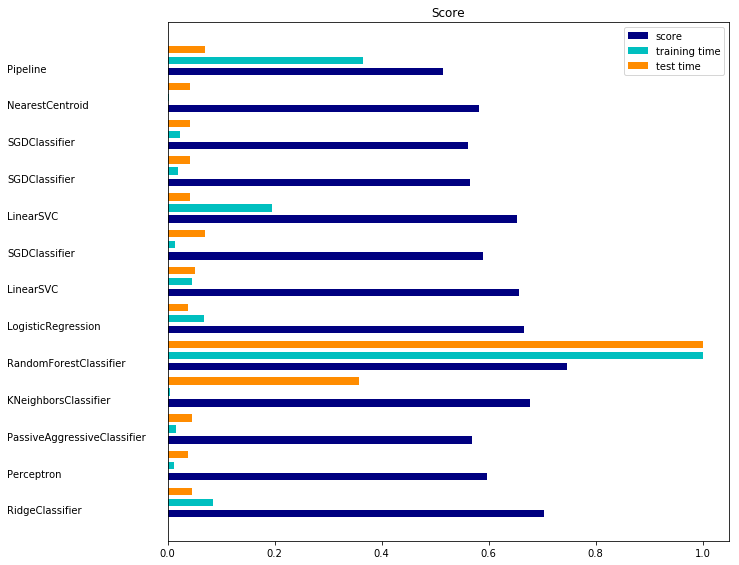

[['RidgeClassifier',
  'Perceptron',
  'PassiveAggressiveClassifier',
  'KNeighborsClassifier',
  'RandomForestClassifier',
  'LogisticRegression',
  'LinearSVC',
  'SGDClassifier',
  'LinearSVC',
  'SGDClassifier',
  'SGDClassifier',
  'NearestCentroid',
  'Pipeline'],
 [0.7028423772609819,
  0.5968992248062015,
  0.5684754521963824,
  0.6770025839793282,
  0.7467700258397932,
  0.6666666666666666,
  0.6563307493540051,
  0.5891472868217055,
  0.6537467700258398,
  0.5658914728682171,
  0.5607235142118863,
  0.5813953488372093,
  0.5142118863049095],
 [0.028887033462524414,
  0.004099130630493164,
  0.0050258636474609375,
  0.0014469623565673828,
  0.34019994735717773,
  0.023080110549926758,
  0.01565384864807129,
  0.004436016082763672,
  0.06654095649719238,
  0.006410121917724609,
  0.00805807113647461,
  0.0009050369262695312,
  0.1240530014038086],
 [0.0005481243133544922,
  0.00044989585876464844,
  0.0005578994750976562,
  0.004331111907958984,
  0.012101888656616211,
  0.0004

In [114]:
ClaM1(0.7)

In [115]:
%%capture
N_ex = 50 # Number of experiments
acc_pred_list = []
for i in range(N_ex):
    res_pred = ClaM1(0.7)
    if i==0:
        method_list = res_pred[0]
    acc_pred_list.append(res_pred[1])

In [116]:
num_method = len(acc_pred_list[0])
res_method = [[] for _ in range(num_method)] # Cannot use [[]]*num_method, because every entry will point to the same list.
for res in acc_pred_list:
    for acc, ls in zip(res, res_method):
        ls.append(acc)
for method, accs in zip(method_list, res_method):
    print("The method: %s\n Mean cla-acc: %s\n Std cla-acc: %s\n" % (method, np.mean(accs), np.std(accs)))

The method: RidgeClassifier
 Mean cla-acc: 0.6821705426356588
 Std cla-acc: 0.02399068607428457

The method: Perceptron
 Mean cla-acc: 0.5709043927648578
 Std cla-acc: 0.03524991068385316

The method: PassiveAggressiveClassifier
 Mean cla-acc: 0.587906976744186
 Std cla-acc: 0.06690508815626789

The method: KNeighborsClassifier
 Mean cla-acc: 0.6934883720930232
 Std cla-acc: 0.021029782080124994

The method: RandomForestClassifier
 Mean cla-acc: 0.751421188630491
 Std cla-acc: 0.017609018126512478

The method: LogisticRegression
 Mean cla-acc: 0.6955038759689923
 Std cla-acc: 0.0218914143077007

The method: LinearSVC
 Mean cla-acc: 0.6744702842377263
 Std cla-acc: 0.03094088397223833

The method: SGDClassifier
 Mean cla-acc: 0.5757622739018088
 Std cla-acc: 0.039809017325706596

The method: LinearSVC
 Mean cla-acc: 0.6861498708010337
 Std cla-acc: 0.0256020588379486

The method: SGDClassifier
 Mean cla-acc: 0.5973643410852713
 Std cla-acc: 0.028553567872922778

The method: SGDClassifie

In [117]:
def ClaM10(p_train):
    # p_train Training data and (1-p_train) Testing data (p_train: the portion of training data set).
    non_sig_col = ['Total_assets_2016','Total_equity_2016','Total_liabilities_2016','Company_Number','Industry_Number']
    X_col_new = [col for col in X_col if col not in non_sig_col]
    print(X_col)
    y_col = 'HNWC_10'
    (X_train, X_test, y_train, y_test) = SplitTrainTest(df_total_liquidity_company_nonzero1, X_col_new, y_col, p_train)

    res_pred = TryClassifiers(X_train, y_train, X_test, y_test, feature_names=None)
    return res_pred

['Cash_and_Cash_Equivalents_2016', 'Current_assets_2016', 'Current_liabilities_2016', 'Current_loans_and_borrowings_2016', 'EBITDA_2016', 'Inventories_2016', 'Net_Debt_2016', 'Net_sales_revenue_2016', 'Non-current_assets_2016', 'Non-current_liabilities_2016', 'Profit_before_income_tax_2016', 'Total_assets_2016', 'Total_equity_2016', 'Total_liabilities_2016', 'Trade_and_other_payables_2016', 'Trade_and_other_receivables_2016', 'Company_Number', 'Industry_Number']
Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='sag',
        tol=0.01)
train time: 0.025s
test time:  0.000s
accuracy:   0.669
dimensionality: 13
density: 1.000000
intercept: [-0.0405427]
coef: [[ 1.23637953e-04  2.70052051e-04  1.41703125e-04  5.51611257e-04
   4.00254543e-05  2.64845715e-04  7.17731943e-05  4.09768069e-05

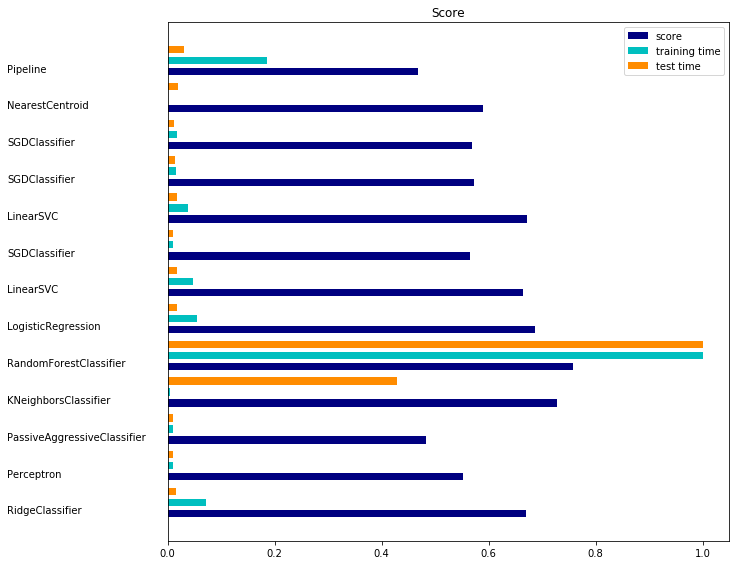

[['RidgeClassifier',
  'Perceptron',
  'PassiveAggressiveClassifier',
  'KNeighborsClassifier',
  'RandomForestClassifier',
  'LogisticRegression',
  'LinearSVC',
  'SGDClassifier',
  'LinearSVC',
  'SGDClassifier',
  'SGDClassifier',
  'NearestCentroid',
  'Pipeline'],
 [0.6692506459948321,
  0.5529715762273901,
  0.48320413436692505,
  0.7286821705426356,
  0.7571059431524548,
  0.6873385012919897,
  0.6640826873385013,
  0.5658914728682171,
  0.6718346253229974,
  0.5736434108527132,
  0.5684754521963824,
  0.5891472868217055,
  0.46770025839793283],
 [0.024530887603759766,
  0.003309011459350586,
  0.0035238265991210938,
  0.0012021064758300781,
  0.344005823135376,
  0.018723011016845703,
  0.01598501205444336,
  0.0031158924102783203,
  0.012858867645263672,
  0.005403995513916016,
  0.005778074264526367,
  0.00034499168395996094,
  0.06399106979370117],
 [0.00016808509826660156,
  0.00011992454528808594,
  0.00011491775512695312,
  0.004724025726318359,
  0.011008977890014648,
 

In [118]:
ClaM10(0.7)

In [119]:
%%capture
N_ex = 50 # Number of experiments
acc_pred_list = []
for i in range(N_ex):
    res_pred = ClaM10(0.7)
    if i==0:
        method_list = res_pred[0]
    acc_pred_list.append(res_pred[1])

In [120]:
num_method = len(acc_pred_list[0])
res_method = [[] for _ in range(num_method)] # Cannot use [[]]*num_method, because every entry will point to the same list.
for res in acc_pred_list:
    for acc, ls in zip(res, res_method):
        ls.append(acc)
for method, accs in zip(method_list, res_method):
    print("The method: %s\n Mean cla-acc: %s\n Std cla-acc: %s\n" % (method, np.mean(accs), np.std(accs)))

The method: RidgeClassifier
 Mean cla-acc: 0.6912144702842378
 Std cla-acc: 0.02467801721468898

The method: Perceptron
 Mean cla-acc: 0.5594315245478036
 Std cla-acc: 0.03452973809629439

The method: PassiveAggressiveClassifier
 Mean cla-acc: 0.49870801033591733
 Std cla-acc: 0.04842738508224341

The method: KNeighborsClassifier
 Mean cla-acc: 0.6910077519379844
 Std cla-acc: 0.020102562042877158

The method: RandomForestClassifier
 Mean cla-acc: 0.752248062015504
 Std cla-acc: 0.019285835724552933

The method: LogisticRegression
 Mean cla-acc: 0.6951937984496124
 Std cla-acc: 0.022844247938647023

The method: LinearSVC
 Mean cla-acc: 0.6762273901808785
 Std cla-acc: 0.033608622268933554

The method: SGDClassifier
 Mean cla-acc: 0.6017054263565891
 Std cla-acc: 0.048836553049198095

The method: LinearSVC
 Mean cla-acc: 0.6797932816537466
 Std cla-acc: 0.027598254087075773

The method: SGDClassifier
 Mean cla-acc: 0.5982428940568476
 Std cla-acc: 0.03776586343616761

The method: SGDCla

## Use the classification model (without equity information) to predict HNWCs for the rest of shareholders.
Previously, we only focus on those shareholders have positive total liquidity. Those shareholders have enough financial information including equity, TR, EBIT, and NI. Here, we focus on the rest of shareholders who may not have equity information, or TR, EBIT, and NI, but have other financial information.

In [7]:
# import pandas as pd
# import numpy as np
# import re
# df_comp_info = pd.read_pickle('../../Database/EMIS/preprocessed/comp_info_human_20180310.pickle')
# df_fina_info = pd.read_pickle('../../Database/EMIS/preprocessed/fina_info_20180309.pickle')
# df_total_liquidity_company = pd.read_pickle('../../Database/EMIS/preprocessed/shareholder_info_20180314.pickle')
# df_total_liquidity_company_nonzero = pd.read_pickle('../../Database/EMIS/preprocessed/shareholder_info_nonzero_liq_20180314.pickle')

In [4]:
list(df_total_liquidity_company_nonzero[:5])

['Shareholder',
 'Shareholder_Name_Normalized',
 'Company_Profile',
 'Company_CNPJ',
 'Company_Equity',
 'Company_Number',
 'Industry_List',
 'NAICS_Num_List',
 'Industry_Number',
 'Total_Deal_Liquidity_Rev',
 'Total_Deal_Liquidity_EBIT',
 'Total_Dividends_Buyback_NI',
 'Total_Dividends_Buyback_Rev',
 'Total_Dividends_Buyback_EBIT',
 'Total_Stock_Compensation_Rev',
 'Total_Liquidity',
 'HNWI_1',
 'HNWI_10',
 'Cash_and_Cash_Equivalents_2016',
 'Current_assets_2016',
 'Current_liabilities_2016',
 'Current_loans_and_borrowings_2016',
 'EBITDA_2016',
 'Inventories_2016',
 'Net_Debt_2016',
 'Net_sales_revenue_2016',
 'Non-current_assets_2016',
 'Non-current_liabilities_2016',
 'Profit_before_income_tax_2016',
 'Total_assets_2016',
 'Total_equity_2016',
 'Total_liabilities_2016',
 'Trade_and_other_payables_2016',
 'Trade_and_other_receivables_2016']

In [65]:
# The company shareholder names that are used in training and testing prediction models.
sh_comp_name_set = set()
for name in df_total_liquidity_company_nonzero["Shareholder"]:
    sh_comp_name_set.add(name)

# The rest company shareholder names that haven't been used in training and testing prediction models.
rest_sh_comp_name_set = set()
count = 0
count_nan_equity = 0
for idx, row in df_comp_info.iterrows():
    if row["Shareholder"] and not row["Shareholder_Is_Human"] and row["Shareholder"] not in sh_comp_name_set:
        rest_sh_comp_name_set.add(row["Shareholder"])
        count += 1
        if np.isnan(row["Equity"]):
            count_nan_equity += 1
print(count, count_nan_equity, len(rest_sh_comp_name_set),len(sh_comp_name_set))

(4499, 4137, 3960, 1753)


In [66]:
from time import time

In [68]:
# Information not related to TR, EBIT, and NI.
df_rest_company = pd.DataFrame(columns=['Shareholder', 'Shareholder_Name_Normalized', 'Company_Profile',
                                       'Company_CNPJ', 'Company_Equity', 'Company_Number', 'Industry_List',
                                       'NAICS_Num_List', 'Industry_Number'])

df_rest_company['Shareholder'] = list(rest_sh_comp_name_set)
start_time = time()
for idx, name in enumerate(df_rest_company["Shareholder"]):
    comp_profile = df_comp_info[df_comp_info["Shareholder"]==name]
    df_rest_company.at[idx, "Shareholder_Name_Normalized"] = comp_profile[
        "Shareholder_Name_Normalized"].items().next()[1]
    df_rest_company.at[idx, "Company_Profile"] = ';'.join(list(comp_profile["Company"]))
    df_rest_company.at[idx, "Company_CNPJ"] = ';'.join(list(comp_profile["CNPJ"]))
    df_rest_company.at[idx, "Company_Equity"] = ';'.join(
        [name+'('+str(equity)+'%)' for name, equity in zip(
                list(comp_profile["CNPJ"]),list(comp_profile["Equity"]))])
    df_rest_company.at[idx, "Company_Number"] = int(comp_profile.shape[0])
    df_rest_company.at[idx, "Industry_List"] = ';'.join(
        reduce((lambda x, y: set(x)|set(y)), [in_ls.split(';') for in_ls in comp_profile["Industry_List"]]))
    df_rest_company.at[idx, "NAICS_Num_List"] = ';'.join(
        reduce((lambda x, y: set(x)|set(y)), [in_ls.split(';') for in_ls in comp_profile["NAICS_Num_List"]]))
    df_rest_company.at[idx, "Industry_Number"] = int(
        len(df_rest_company.at[idx, "NAICS_Num_List"].split(';')))
print("Time spent %s" % (time()-start_time))
df_rest_company[:10]

Time spent 8.96731495857


,Shareholder,Shareholder_Name_Normalized,Company_Profile,Company_CNPJ,Company_Equity,Company_Number,Industry_List,NAICS_Num_List,Industry_Number
0,Waters Technologies Corporation,corporation technologies waters,Waters Technologies Do Brasil Ltda.,00158141000137,00158141000137(nan%),1,"Merchant Wholesalers, Nondurable Goods",424,1
1,Tecnomont Administracao E Participacao Ltda,administracao e ltd participacao tecnomont,Tecnomont Montagens Industriais Ltda,10675555000197,10675555000197(nan%),1,Heavy and Civil Engineering Construction,237,1
2,Honeywell International Inc.,honeywell inc international,Honeywell Do Brasil Ltda.,61338844000131,61338844000131(nan%),1,"Architectural, Engineering, and Related Services",5413,1
3,Ika Works Inc,ika inc works,Ika Brasil Equipamentos Laboratoriais Analitic...,04213425000130,04213425000130(nan%),1,"Navigational, Measuring, Electromedical, and C...",33451,1
4,Santo Antonio Participacoes Ltda,antonio ltd participacoes santo,Soll Distribuidora De Petroleo Ltda,01683557000137,01683557000137(nan%),1,Petroleum and Petroleum Products Merchant Whol...,4247,1
5,Delphi Latin America Sarl,america delphi latin sarl,Delphi Automotive Systems Do Brasil Ltda (Sao ...,00857758000140;00857758001112,00857758000140(nan%);00857758001112(nan%),2,Repair and Maintenance ; Transportation Equipm...,811;336;3363,3
6,Jgr Participacoes S.a.,jgr participacoes s.a.,Betonit Engenharia Industria E Comercio Ltda,46114088000173,46114088000173(nan%),1,Cement and Concrete Product Manufacturing,3273,1
7,Plaza Food Alimentos Ltda,alimentos food ltd plaza,Spigadoro Comercio De Alimentos Ltda,53092482000113,53092482000113(nan%),1,Food Services and Drinking Places,722,1
8,Jvc Kenwood Corporation,corporation jvc kenwood,Jvckenwood Do Brasil Comercio De Eletronicos L...,00978639000146,00978639000146(nan%),1,Household Appliances and Electrical and Electr...,4236,1
9,Unisys South America Llc,america llc south unisys,Unisys Brasil Ltda.,33426420000193,33426420000193(nan%),1,Electronics and Appliance Stores,443,1


In [69]:
df_rest_company.shape

(3960, 9)

In [80]:
CopyFinaInfoNotUseEquity(useful_fina_col, df_fina_info, df_rest_company, '2016')

In [81]:
df_rest_company[:5]

,Shareholder,Shareholder_Name_Normalized,Company_Profile,Company_CNPJ,Company_Equity,Company_Number,Industry_List,NAICS_Num_List,Industry_Number,Cash_and_Cash_Equivalents_2016,...,Net_Debt_2016,Net_sales_revenue_2016,Non-current_assets_2016,Non-current_liabilities_2016,Profit_before_income_tax_2016,Total_assets_2016,Total_equity_2016,Total_liabilities_2016,Trade_and_other_payables_2016,Trade_and_other_receivables_2016
0,Waters Technologies Corporation,corporation technologies waters,Waters Technologies Do Brasil Ltda.,00158141000137,00158141000137(nan%),1,"Merchant Wholesalers, Nondurable Goods",424,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Tecnomont Administracao E Participacao Ltda,administracao e ltd participacao tecnomont,Tecnomont Montagens Industriais Ltda,10675555000197,10675555000197(nan%),1,Heavy and Civil Engineering Construction,237,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Honeywell International Inc.,honeywell inc international,Honeywell Do Brasil Ltda.,61338844000131,61338844000131(nan%),1,"Architectural, Engineering, and Related Services",5413,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ika Works Inc,ika inc works,Ika Brasil Equipamentos Laboratoriais Analitic...,04213425000130,04213425000130(nan%),1,"Navigational, Measuring, Electromedical, and C...",33451,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Santo Antonio Participacoes Ltda,antonio ltd participacoes santo,Soll Distribuidora De Petroleo Ltda,01683557000137,01683557000137(nan%),1,Petroleum and Petroleum Products Merchant Whol...,4247,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
all_col_names = list(df_rest_company)
df_rest_company_exist_fina = pd.DataFrame(columns=all_col_names)
row_temp = 0
for idx, row in df_rest_company.iterrows():
    if any(list(row[all_col_names[9:]])):
        df_rest_company_exist_fina.loc[row_temp] = row
        row_temp += 1
print(df_rest_company_exist_fina.shape)
df_rest_company_exist_fina[:10]

(331, 25)


,Shareholder,Shareholder_Name_Normalized,Company_Profile,Company_CNPJ,Company_Equity,Company_Number,Industry_List,NAICS_Num_List,Industry_Number,Cash_and_Cash_Equivalents_2016,...,Net_Debt_2016,Net_sales_revenue_2016,Non-current_assets_2016,Non-current_liabilities_2016,Profit_before_income_tax_2016,Total_assets_2016,Total_equity_2016,Total_liabilities_2016,Trade_and_other_payables_2016,Trade_and_other_receivables_2016
0,Unisys South America Llc,america llc south unisys,Unisys Brasil Ltda.,33426420000193,33426420000193(nan%),1,Electronics and Appliance Stores,443,1,28.89,...,-27.03,133.01,148.55,89.86,7.21,244.61,104.82,139.80,19.14,47.71
1,Zuquetti & Marzola Participacoes E Representac...,e ltd marzola participacoes representacoes zuq...,Cervejaria Petropolis Da Bahia Ltda.;Internati...,15350602000146;09169096000190;08415791000122;1...,15350602000146(nan%);09169096000190(nan%);0841...,4,Truck Transportation ;Plastics Product Manufac...,3261;31212;484,3,6.69,...,130.75,387.07,356.54,136.01,83.75,447.66,229.04,218.62,34.51,43.38
2,Graber Sistemas De Seguranca Ltda,de graber ltd seguranca sistemas,Elma Servicos Gerais E Representacao Ltda.,59058487000106,59058487000106(nan%),1,Other Support Services,5619,1,2.49,...,1.02,56.34,10.72,1.80,3.80,24.96,11.88,13.08,6.38,9.22
3,Rexam Overseas Holdings Limited,holdings limited overseas rexam,Ball do Brasil Ltda.,00771979000100,00771979000100(nan%),1,Repair and Maintenance ; Fabricated Metal Prod...,811;332,2,26.14,...,-24.46,121.52,897.47,157.40,183.72,1026.69,796.26,230.43,51.42,31.26
4,Rioforte Investment Holding Brasil S.A.,brasil holding investment rioforte s.a.,Erb - Energias Renovaveis do Brasil S.A.,09324653000109,09324653000109(49.0%),1,Management of Companies and Enterprises,55,1,0.33,...,136.08,33.36,177.99,9.43,-49.50,192.40,2.44,189.96,28.39,3.55
5,Novo Nordisk Farmaceutica Do Brasil Ltda,brasil do farmaceutica ltd nordisk novo,Novo Nordisk Producao Farmaceutica Do Brasil L...,16921603000166,16921603000166(nan%),1,Pharmaceutical and Medicine Manufacturing,3254,1,0.56,...,-0.53,212.02,167.21,0.39,12.92,432.07,252.70,179.37,173.99,176.66
6,Elma Servicos Gerais E Representacao Ltda,e elma gerais ltd representacao servicos,Graber Sistemas De Seguranca Ltda.,87169900000145,87169900000145(nan%),1,Investigation and Security Services,5616,1,9.32,...,17.12,121.24,19.90,18.28,3.23,66.77,15.33,51.45,12.38,17.54
7,Nov Flexibles Holding Aps,aps flexibles holding nov,Nov Flexibles Equipamentos E Servicos Ltda.,13812133000104,13812133000104(nan%),1,Plastics Product Manufacturing,3261,1,34.45,...,-26.73,144.17,162.30,4.88,46.98,366.87,337.58,29.29,15.09,71.75
8,Fazenda do Estado de Sao Paulo,de do estado fazenda paulo sao,Dersa Desenvolvimento Rodoviario S.A.,62464904000125,62464904000125(100.0%),1,Support Activities for Transportation,488,1,0.24,...,-0.23,21.42,895.64,353.95,-43.11,907.09,484.57,422.52,52.44,0.62
9,Ball Do Brasil Ltda,ball brasil do ltd,Rexam Amazonia Ltda.,04838649000137,04838649000137(nan%),1,Fabricated Metal Product Manufacturing,332,1,82.14,...,-76.86,389.46,213.40,0.32,151.53,483.77,413.13,70.64,57.09,78.36


In [83]:
df_rest_company_exist_fina.to_excel('../../Database/EMIS/preprocessed/rest_company_fina_predictive_20180522.xlsx',encoding='utf16')

In [127]:
# Split data into train and test data.
non_sig_col = ['Total_assets_2016','Total_equity_2016','Total_liabilities_2016','Company_Number','Industry_Number']
X_col_new = [col for col in X_col if col not in non_sig_col]
print(X_col_new)
y_col = 'HNWC_10'

X_train = copy.deepcopy(df_total_liquidity_company_nonzero1[X_col_new])
X_pred = copy.deepcopy(df_rest_company_exist_fina[X_col_new])
y_train = copy.deepcopy(df_total_liquidity_company_nonzero1[y_col])

['Cash_and_Cash_Equivalents_2016', 'Current_assets_2016', 'Current_liabilities_2016', 'Current_loans_and_borrowings_2016', 'EBITDA_2016', 'Inventories_2016', 'Net_Debt_2016', 'Net_sales_revenue_2016', 'Non-current_assets_2016', 'Non-current_liabilities_2016', 'Profit_before_income_tax_2016', 'Trade_and_other_payables_2016', 'Trade_and_other_receivables_2016']


In [135]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_pred)
print(y_pred)
HNWC_candi = []
HNWC_candi_comp = []
HNWC_candi_comp_cnpj = []
for idx, y in enumerate(y_pred):
    if y:
        HNWC_candi.append(df_rest_company_exist_fina.loc[idx, "Shareholder"])
        HNWC_candi_comp.append(df_rest_company_exist_fina.loc[idx, "Company_Profile"])
        HNWC_candi_comp_cnpj.append(df_rest_company_exist_fina.loc[idx, "Company_CNPJ"])
print(HNWC_candi)
print(HNWC_candi_comp)

[0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[u'Joao Paulo Franco Rossi Cuppoloni', u'Pentagna Guimaraes', u'Mesa - S', u'Marcos Antonio Da Fonseca', u'Quotas Liberadas', u'Eduardo Gribel Homem de Castro', u'Joao Rossi Cuppoloni', u'Liebherr-Aerospace & Transportation', u'Adriana Lilian Camargos', u'Perkinelmer Health Sciences', u'Porem Nao Dispomos do Documento Registrado. Fonte: Ata Age - 22/']
[u'Rossi Residencial S.A.', u'Banco Bmg S.A.', u'Coim Brasil Ltda.', u'Hosp Log Comercio de Produtos Hospitalares Ltda', u'Porto Sudeste do Brasil S/A', u'Tenco Shopping Centers S.A.', u'Rossi Residencial S.A.', u'Liebherr Aerospace Brasil Industria E Comercio De Equipamentos Aeronauticos Ltda.', u'Tenco Shopping Centers S.A.', u'Perkinelmer Do Brasil Ltda.', u'Tenco Shopping Centers S.A.']


In [136]:
ls_rest_company=[[candi, comp, cnpj] for candi, comp, cnpj in zip(HNWC_candi, HNWC_candi_comp, HNWC_candi_comp_cnpj)]
df_rest_company=pd.DataFrame(ls_rest_company, columns = ['Shareholder', 'Company', "Company_CNPJ"])
ObtainAddr(df_rest_company, df_comp_info_raw)
df_rest_company.to_excel('../../Database/EMIS/preprocessed/HNWC_rest_70_person.xlsx',encoding='utf16')

In [420]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_pred.astype(float))
print(y_pred)
HNWC_candi = []
for idx, y in enumerate(y_pred):
    if y:
        HNWC_candi.append(df_rest_company_exist_fina.loc[idx, "Shareholder"])
print(HNWC_candi)

[0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[u'Joao Paulo Franco Rossi Cuppoloni', u'F\xe1bio Roberto Chimenti Auriemo', u'May Ganme Cividanes', u'Roche Finanz Ag', u'P&Amp;Wc Aerospace (Us)', u'Pentagna Guimaraes', u'Mesa - S', u'Marcos Antonio Da Fonseca', u'Quotas Liberadas', u'Joao Rossi Cuppoloni', u'Liebherr-Aerospace & Transportation', u'Jos\xe9 Auriemo Neto', u'Log & Print Grafica']


In [422]:
df_rest_company_exist_fina[:5]

,Shareholder,Shareholder_Name_Normalized,Company_Profile,Company_CNPJ,Company_Equity,Company_Number,Industry_List,NAICS_Num_List,Industry_Number,Cash_and_Cash_Equivalents_2016,...,Net_Debt_2016,Net_sales_revenue_2016,Non-current_assets_2016,Non-current_liabilities_2016,Profit_before_income_tax_2016,Total_assets_2016,Total_equity_2016,Total_liabilities_2016,Trade_and_other_payables_2016,Trade_and_other_receivables_2016
0,Lilian Raquel Czeresnia Nigri,czeresnia lilian nigri raquel,Tecnisa S.A.,08065557000112,08065557000112(4.09%),1,Real Estate ; Construction of Buildings,531;236,2,3.72,...,302.87,97.93,437.90,192.71,-129.31,959.94,444.36,515.57,104.73,140.86
1,Maria Silvana Caramori Saab,caramori maria saab silvana,Reunidas S.A Transportes Coletivos,83054395000132,83054395000132(9.6%),1,Transit and Ground Passenger Transportation,485,1,2.88,...,2.53,49.57,220.05,91.75,-21.46,235.95,-78.73,314.68,28.24,7.13
2,Joao Paulo Franco Rossi Cuppoloni,cuppoloni franco joao paulo rossi,Rossi Residencial S.A.,61065751000180,61065751000180(10.02%),1,Construction of Buildings,236,1,14.08,...,573.21,154.46,865.17,433.40,-151.52,1478.26,225.11,1253.16,507.86,289.80
3,Fábio Roberto Chimenti Auriemo,auriemo chimenti fabio roberto,Jhsf Participacoes S.A.,08294224000165,08294224000165(4.63%),1,Heavy and Civil Engineering Construction ; Man...,237;55,2,21.37,...,407.31,110.41,1100.96,590.38,-126.21,1457.76,680.37,777.39,95.31,166.43
4,May Ganme Cividanes,cividanes ganme may,Impar Servicos Hospitalares S.A.,60884855000154,60884855000154(nan%),1,Ambulatory Health Care Services,621,1,21.37,...,407.31,110.41,1100.96,590.38,-126.21,1457.76,680.37,777.39,95.31,166.43
